In [391]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from os.path import exists
from IPython.display import display_html
sns.set()
pd.set_option('display.max_columns', None)

In [392]:
if not exists("df.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("df.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_features = pd.read_csv("df.csv", low_memory = False)
df_features.head()

barrio         dia direccion_viento_tarde  \
0           Retiro  2016-10-11                   Este   
1  Vélez Sársfield  2016-03-28                    Sur   
2          Palermo  2017-05-11             Sursureste   
3        Mataderos  2012-05-07               suroeste   
4         Recoleta  2014-06-19             Nornoreste   

  direccion_viento_temprano  horas_de_sol  humedad_tarde  humedad_temprano  \
0                Nornoreste          10.7           59.0              56.0   
1                  suroeste           0.0           49.0              83.0   
2                     Norte           4.3           59.0              83.0   
3                       Sur           NaN           67.0              93.0   
4                Nornoreste           0.8           94.0              97.0   

       id llovieron_hamburguesas_hoy  mm_evaporados_agua  mm_lluvia_dia  \
0   86942                         no                16.0            0.0   
1  102098                         no                 2.6            0.0   
2   67154                         no                 2.4            0.0   
3   50245                         no                 NaN            0.0   
4   82904                         no                 0.8            0.0   

   nubosidad_tarde  nubosidad_temprano presion_atmosferica_tarde  \
0              3.0                 1.0                    1009.9   
1              8.0                 7.0                    1020.4   
2              7.0                 7.0                    1024.8   
3              NaN                 NaN                    1017.0   
4              NaN                 NaN                    1016.1   

   presion_atmosferica_temprano rafaga_viento_max_direccion  \
0                        1010.2                 Estesureste   
1                        1021.4                         Sur   
2                        1026.5                       Norte   
3                        1020.0               Oestesuroeste   
4                        1021.9                  Nornoreste   

   rafaga_viento_max_velocidad  temp_max  temp_min  temperatura_tarde  \
0                         33.0      29.2      16.8               24.1   
1                         31.0      16.9      10.6               16.4   
2                         26.0      16.6       4.4               15.7   
3                         13.0      11.4       0.8               11.1   
4                         33.0      11.6       6.7               11.2   

   temperatura_temprano  velocidad_viendo_tarde  velocidad_viendo_temprano  
0                  25.3                    19.0                        4.0  
1                  12.3                    13.0                        7.0  
2                   9.4                     9.0                       13.0  
3                   4.0                     6.0                        6.0  
4                   8.8                    11.0                       15.0

In [393]:
if not exists("df_resultados.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("df_resultados.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("df_resultados.csv", low_memory=False)
df_target.head()

id llovieron_hamburguesas_al_dia_siguiente
0   86942                                      no
1  102098                                      no
2   67154                                      no
3   50245                                      no
4   82904                                      no

In [394]:
df = df_features.merge(df_target, on = 'id') #Justificar?
df.set_index("id", inplace=True)
#Corrige typo
df.rename(columns={"velocidad_viendo_tarde": "velocidad_viento_tarde",
          "velocidad_viendo_temprano": "velocidad_viento_temprano"}, inplace=True)
df_original = df.copy()

## ¿Cómo son las columnas del dataset?

In [395]:
display(df.head())
df.dtypes.to_frame("Tipo de dato")

barrio         dia direccion_viento_tarde  \
id                                                           
86942            Retiro  2016-10-11                   Este   
102098  Vélez Sársfield  2016-03-28                    Sur   
67154           Palermo  2017-05-11             Sursureste   
50245         Mataderos  2012-05-07               suroeste   
82904          Recoleta  2014-06-19             Nornoreste   

       direccion_viento_temprano  horas_de_sol  humedad_tarde  \
id                                                              
86942                 Nornoreste          10.7           59.0   
102098                  suroeste           0.0           49.0   
67154                      Norte           4.3           59.0   
50245                        Sur           NaN           67.0   
82904                 Nornoreste           0.8           94.0   

        humedad_temprano llovieron_hamburguesas_hoy  mm_evaporados_agua  \
id                                                                        
86942               56.0                         no                16.0   
102098              83.0                         no                 2.6   
67154               83.0                         no                 2.4   
50245               93.0                         no                 NaN   
82904               97.0                         no                 0.8   

        mm_lluvia_dia  nubosidad_tarde  nubosidad_temprano  \
id                                                           
86942             0.0              3.0                 1.0   
102098            0.0              8.0                 7.0   
67154             0.0              7.0                 7.0   
50245             0.0              NaN                 NaN   
82904             0.0              NaN                 NaN   

       presion_atmosferica_tarde  presion_atmosferica_temprano  \
id                                                               
86942                     1009.9                        1010.2   
102098                    1020.4                        1021.4   
67154                     1024.8                        1026.5   
50245                     1017.0                        1020.0   
82904                     1016.1                        1021.9   

       rafaga_viento_max_direccion  rafaga_viento_max_velocidad  temp_max  \
id                                                                          
86942                  Estesureste                         33.0      29.2   
102098                         Sur                         31.0      16.9   
67154                        Norte                         26.0      16.6   
50245                Oestesuroeste                         13.0      11.4   
82904                   Nornoreste                         33.0      11.6   

        temp_min  temperatura_tarde  temperatura_temprano  \
id                                                          
86942       16.8               24.1                  25.3   
102098      10.6               16.4                  12.3   
67154        4.4               15.7                   9.4   
50245        0.8               11.1                   4.0   
82904        6.7               11.2                   8.8   

        velocidad_viento_tarde  velocidad_viento_temprano  \
id                                                          
86942                     19.0                        4.0   
102098                    13.0                        7.0   
67154                      9.0                       13.0   
50245                      6.0                        6.0   
82904                     11.0                       15.0   

       llovieron_hamburguesas_al_dia_siguiente  
id                                              
86942                                       no  
102098                                      no  
67154                                       no  
50245                                       no  
82904       

Tipo de dato
barrio                                        object
dia                                           object
direccion_viento_tarde                        object
direccion_viento_temprano                     object
horas_de_sol                                 float64
humedad_tarde                                float64
humedad_temprano                             float64
llovieron_hamburguesas_hoy                    object
mm_evaporados_agua                           float64
mm_lluvia_dia                                float64
nubosidad_tarde                              float64
nubosidad_temprano                           float64
presion_atmosferica_tarde                     object
presion_atmosferica_temprano                 float64
rafaga_viento_max_direccion                   object
rafaga_viento_max_velocidad                  float64
temp_max                                     float64
temp_min                                     float64
temperatura_tarde                            float64
temperatura_temprano                         float64
velocidad_viento_tarde                       float64
velocidad_viento_temprano                    float64
llovieron_hamburguesas_al_dia_siguiente       object

Podemos ver que la feature presion_atmosferica_tarde esta con tipo de dato extraño, cuando en realidad debería ser un número.
También las columnas de llovieron_hamburguesas_hoy y llovieron_hamburguesas_al_dia_siguiente son strings. Nos parece más convenientes que sean simplemente números donde 'no' es 0 y 'si' es 1.

In [508]:
df.replace({'llovieron_hamburguesas_hoy': {"si": 1, "no": 0},
           'llovieron_hamburguesas_al_dia_siguiente': {"si": 1, "no": 0 }},
           inplace = True)
df.llovieron_hamburguesas_al_dia_siguiente.astype(np.float64, copy=False)
df.llovieron_hamburguesas_hoy.astype(np.float64, copy=False)
df.head()

barrio         dia direccion_viento_tarde  \
id                                                           
86942            Retiro  2016-10-11                   Este   
102098  Vélez Sársfield  2016-03-28                    Sur   
67154           Palermo  2017-05-11             Sursureste   
50245         Mataderos  2012-05-07               suroeste   
82904          Recoleta  2014-06-19             Nornoreste   

       direccion_viento_temprano  horas_de_sol  humedad_tarde  \
id                                                              
86942                 Nornoreste          10.7           59.0   
102098                  suroeste           0.0           49.0   
67154                      Norte           4.3           59.0   
50245                        Sur           NaN           67.0   
82904                 Nornoreste           0.8           94.0   

        humedad_temprano  llovieron_hamburguesas_hoy  mm_evaporados_agua  \
id                                                                         
86942               56.0                         0.0                16.0   
102098              83.0                         0.0                 2.6   
67154               83.0                         0.0                 2.4   
50245               93.0                         0.0                 NaN   
82904               97.0                         0.0                 0.8   

        mm_lluvia_dia  nubosidad_tarde  nubosidad_temprano  \
id                                                           
86942             0.0              3.0                 1.0   
102098            0.0              8.0                 7.0   
67154             0.0              7.0                 7.0   
50245             0.0              NaN                 NaN   
82904             0.0              NaN                 NaN   

       presion_atmosferica_tarde  presion_atmosferica_temprano  \
id                                                               
86942                     1009.9                        1010.2   
102098                    1020.4                        1021.4   
67154                     1024.8                        1026.5   
50245                     1017.0                        1020.0   
82904                     1016.1                        1021.9   

       rafaga_viento_max_direccion  rafaga_viento_max_velocidad  temp_max  \
id                                                                          
86942                  Estesureste                         33.0      29.2   
102098                         Sur                         31.0      16.9   
67154                        Norte                         26.0      16.6   
50245                Oestesuroeste                         13.0      11.4   
82904                   Nornoreste                         33.0      11.6   

        temp_min  temperatura_tarde  temperatura_temprano  \
id                                                          
86942       16.8               24.1                  25.3   
102098      10.6               16.4                  12.3   
67154        4.4               15.7                   9.4   
50245        0.8               11.1                   4.0   
82904        6.7               11.2                   8.8   

        velocidad_viento_tarde  velocidad_viento_temprano  \
id                                                          
86942                     19.0                        4.0   
102098                    13.0                        7.0   
67154                      9.0                       13.0   
50245                      6.0                        6.0   
82904                     11.0                       15.0   

        llovieron_hamburguesas_al_dia_siguiente  
id                                               
86942                                       0.0  
102098                                      0.0  
67154                                       0.0  
50245                                       0.0  

In [509]:
try:
    df.astype({'presion_atmosferica_tarde' : np.float64})
except Exception as e:
    print(str(e))

could not convert string to float: '1.009.555'


En *presion_atmosferica_tarde* falla al transformarse a número por que hay un valor con 2 puntos. Vamos a ver cuantos más hay:

In [510]:
df = df.astype({'presion_atmosferica_tarde' : str})
indices_con_error = []
for index, row in df.iterrows():
    try:
        float(row['presion_atmosferica_tarde'])
    except:
        indices_con_error.append(index)
        print(f"Fila {index} con dato {row['presion_atmosferica_tarde']} no puede ser convertida a float")

Fila 30388 con dato 1.009.555 no puede ser convertida a float
Fila 30418 con dato 10.167.769.999.999.900 no puede ser convertida a float


Como son solo 2, suponemos que simplemente el error produjo al cargar los datos. Decidimos dropear las filas ya que contienen información incorrecta

In [511]:
for index in indices_con_error:
    df.drop(index, inplace=True, errors="ignore")

df['presion_atmosferica_tarde'] = df['presion_atmosferica_tarde'].astype(np.float64)

Cambiamos el tipo de las variables categóricas

In [512]:
df = df.astype({
    "barrio": "category",
    "direccion_viento_tarde": "category",
    "direccion_viento_temprano": "category",
    "rafaga_viento_max_direccion": "category"
})

Convertimos la columna dia a datetime

In [513]:
df.dia = pd.to_datetime(df.dia)

In [514]:
df.dtypes.to_frame("Tipo de dato")

Tipo de dato
barrio                                         category
dia                                      datetime64[ns]
direccion_viento_tarde                         category
direccion_viento_temprano                      category
horas_de_sol                                    float64
humedad_tarde                                   float64
humedad_temprano                                float64
llovieron_hamburguesas_hoy                      float64
mm_evaporados_agua                              float64
mm_lluvia_dia                                   float64
nubosidad_tarde                                 float64
nubosidad_temprano                              float64
presion_atmosferica_tarde                       float64
presion_atmosferica_temprano                    float64
rafaga_viento_max_direccion                    category
rafaga_viento_max_velocidad                     float64
temp_max                                        float64
temp_min                                        float64
temperatura_tarde                               float64
temperatura_temprano                            float64
velocidad_viento_tarde                          float64
velocidad_viento_temprano                       float64
llovieron_hamburguesas_al_dia_siguiente         float64

In [515]:
variables_numericas = df.select_dtypes(include=['float64']).columns.drop("llovieron_hamburguesas_al_dia_siguiente")
variable_target = "llovieron_hamburguesas_al_dia_siguiente"
variables_categoricas = df.select_dtypes(include=["category"]).columns
variable_fecha = df.select_dtypes(include=["datetime64[ns]"]).columns

Luego de este análisis, podemos observar que el dataset está compuesto de 17 variables numéricas (incluyendo llovieron_hamburguesas_hoy, que antes era booleana), 4 categóricas y 1 de fecha. Además, contamos con la variable target

## ¿Cuántos valores distintos puede tomar cada feature?

In [404]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [405]:
valores_unicos = df.nunique(dropna=False).sort_values(ascending=False).to_frame("Valores distintos")
display_side_by_side(valores_unicos.iloc[:8],
                    valores_unicos.iloc[8:16],
                    valores_unicos.iloc[16:])

Valores distintos 
 
 
 
 
 dia 
 3405 
 
 
 mm_lluvia_dia 
 636 
 
 
 presion_atmosferica_temprano 
 543 
 
 
 presion_atmosferica_tarde 
 541 
 
 
 temp_max 
 502 
 
 
 temperatura_tarde 
 498 
 
 
 temperatura_temprano 
 438 
 
 
 temp_min 
 386 
 
 
 
 
 
 
 Valores distintos 
 
 
 
 
 mm_evaporados_agua 
 335 
 
 
 horas_de_sol 
 145 
 
 
 humedad_temprano 
 102 
 
 
 humedad_tarde 
 102 
 
 
 rafaga_viento_max_velocidad 
 66 
 
 
 barrio 
 49 
 
 
 velocidad_viento_temprano 
 44 
 
 
 velocidad_viento_tarde 
 44 
 
 
 
 
 
 
 Valores distintos 
 
 
 
 
 direccion_viento_temprano 
 16 
 
 
 rafaga_viento_max_direccion 
 16 
 
 
 direccion_viento_tarde 
 16 
 
 
 nubosidad_temprano 
 11 
 
 
 nubosidad_tarde 
 11 
 
 
 llovieron_hamburguesas_hoy 
 3 
 
 
 llovieron_hamburguesas_al_dia_siguiente 
 3

Podemos observar que las variables nubosidad_temprano y nubosidad_tarde tienen solo 11 valores distintos, por lo que podemos considerarlas variables discretas, mientras que el resto tiene una cardinalidad suficientemente alta como para considerarlas continuas (lo cual resultará importante a la hora de visualizar la información). Las variables llovieron_hamburguesas_hoy y llovieron_hamburguesas_al_dia_siguiente son booleanas, como ya se vio anteriormente, pero tienen 3 valores distintos. Esto se debe a que también se contaron los NaN.

In [406]:
variables_continuas = df[variables_numericas].nunique().sort_values(ascending=False).index[:-4]
variables_discretas = ["nubosidad_temprano", "nubosidad_tarde"]

Por otro lado, resulta llamativo que la cantidad de valores distintos de nubosidad_temprano y nubosidad_tarde sea 11 ya que, según el enunciado, la variable toma valores entre 0 y 8.

In [407]:
print(f"nubosidad_temprano: \t{list(df.nubosidad_temprano.unique())}")
print(f"nubosidad_tarde: \t{list(df.nubosidad_tarde.unique())}")

nubosidad_temprano: 	[1.0, 7.0, nan, 8.0, 3.0, 0.0, 2.0, 5.0, 6.0, 4.0, 9.0]
nubosidad_tarde: 	[3.0, 8.0, 7.0, nan, 5.0, 0.0, 1.0, 4.0, 2.0, 6.0, 9.0]


Por un lado vemos que tenemos missings, pero también datos incorrectos (9).

In [408]:
display(df[df.nubosidad_temprano == 9])
display(df[df.nubosidad_tarde == 9])

barrio        dia direccion_viento_tarde  \
id                                                      
47226       Liniers 2012-05-27            Sursuroeste   
30776  Constitución 2009-09-23                  Oeste   

      direccion_viento_temprano  horas_de_sol  humedad_tarde  \
id                                                             
47226                Nornoreste           7.8           41.0   
30776                     Oeste           8.0           36.0   

       humedad_temprano  llovieron_hamburguesas_hoy  mm_evaporados_agua  \
id                                                                        
47226              99.0                         0.0                 NaN   
30776              40.0                         1.0                11.2   

       mm_lluvia_dia  nubosidad_tarde  nubosidad_temprano  \
id                                                          
47226            0.0              NaN                 9.0   
30776            4.4              3.0                 9.0   

       presion_atmosferica_tarde  presion_atmosferica_temprano  \
id                                                               
47226                     1020.7                        1022.4   
30776                      997.8                         996.8   

      rafaga_viento_max_direccion  rafaga_viento_max_velocidad  temp_max  \
id                                                                         
47226                    suroeste                         30.0      14.5   
30776                         NaN                          NaN      21.8   

       temp_min  temperatura_tarde  temperatura_temprano  \
id                                                         
47226       0.6               14.2                   4.4   
30776      17.0               20.9                  17.3   

       velocidad_viento_tarde  velocidad_viento_temprano  \
id                                                         
47226                     9.0                        4.0   
30776                    37.0                       30.0   

       llovieron_hamburguesas_al_dia_siguiente  
id                                              
47226                                      0.0  
30776                                      0.0

barrio        dia direccion_viento_tarde  \
id                                                       
106933  Villa Crespo 2012-11-02            Estesureste   

       direccion_viento_temprano  horas_de_sol  humedad_tarde  \
id                                                              
106933                   Sureste          11.4           13.0   

        humedad_temprano  llovieron_hamburguesas_hoy  mm_evaporados_agua  \
id                                                                         
106933              45.0                         0.0                11.6   

        mm_lluvia_dia  nubosidad_tarde  nubosidad_temprano  \
id                                                           
106933            0.2              9.0                 6.0   

        presion_atmosferica_tarde  presion_atmosferica_temprano  \
id                                                                
106933                     1015.2                        1019.0   

       rafaga_viento_max_direccion  rafaga_viento_max_velocidad  temp_max  \
id                                                                          
106933                  Sursureste                         39.0      24.6   

        temp_min  temperatura_tarde  temperatura_temprano  \
id                                                          
106933      10.6               23.7                  14.8   

        velocidad_viento_tarde  velocidad_viento_temprano  \
id                                                          
106933                    17.0                       26.0   

        llovieron_hamburguesas_al_dia_siguiente  
id                                               
106933                                      0.0

Se trata de 3 muestras con datos mal cargados, por lo tanto podemos dropearlas

In [409]:
df.drop(labels=df[df.nubosidad_temprano == 9].index, inplace=True)
df.drop(labels=df[df.nubosidad_tarde == 9].index, inplace=True)

Otro detalle que llama la atención, es que hay 49 valores distintos para barrio, cuando en realidad solo hay 48 barrios porteños

In [410]:
barrio_counts = df.barrio.value_counts().to_frame().sort_index()

display_side_by_side(barrio_counts.iloc[:10],
                     barrio_counts.iloc[10:20],
                     barrio_counts.iloc[20:30],
                     barrio_counts.iloc[30:40],
                     barrio_counts.iloc[40:])

barrio 
 
 
 
 
 Agronomía 
 2403 
 
 
 Almagro 
 2398 
 
 
 Balvanera 
 2421 
 
 
 Barracas 
 2430 
 
 
 Belgrano 
 2393 
 
 
 Boedo 
 2426 
 
 
 Caballito 
 2384 
 
 
 Chacarita 
 2386 
 
 
 Coghlan 
 2444 
 
 
 Colegiales 
 2417 
 
 
 
 
 
 
 barrio 
 
 
 
 
 Constitución 
 2654 
 
 
 Flores 
 2410 
 
 
 Floresta 
 2384 
 
 
 La Boca 
 2366 
 
 
 La Paternal 
 2412 
 
 
 Liniers 
 2736 
 
 
 Mataderos 
 2441 
 
 
 Monserrat 
 2462 
 
 
 Monte Castro 
 2413 
 
 
 Nueva Pompeya 
 2423 
 
 
 
 
 
 
 barrio 
 
 
 
 
 Núñez 
 2399 
 
 
 Palermo 
 2432 
 
 
 Palermo cheto 
 1281 
 
 
 Parque Avellaneda 
 2526 
 
 
 Parque Chacabuco 
 2435 
 
 
 Parque Chas 
 1272 
 
 
 Parque Patricios 
 2410 
 
 
 Puerto Madero 
 2362 
 
 
 Recoleta 
 2429 
 
 
 Retiro 
 2580 
 
 
 
 
 
 
 barrio 
 
 
 
 
 Saavedra 
 2464 
 
 
 San Cristóbal 
 2427 
 
 
 San Nicolás 
 2482 
 
 
 San Telmo 
 2518 
 
 
 Versalles 
 2387 
 
 
 Villa Crespo 
 2434 
 
 
 Villa Devoto 
 2436 
 
 
 Villa General Mitre 
 2431 
 
 
 Villa Lugano 
 2374 
 
 
 Villa Luro 
 2578 
 
 
 
 
 
 
 barrio 
 
 
 
 
 Villa Ortúzar 
 2401 
 
 
 Villa Pueyrredón 
 2381 
 
 
 Villa Real 
 2561 
 
 
 Villa Riachuelo 
 2428 
 
 
 Villa Santa Rita 
 2410 
 
 
 Villa Soldati 
 2611 
 
 
 Villa Urquiza 
 1261 
 
 
 Villa del Parque 
 2429 
 
 
 Vélez Sársfield 
 2421

Vemos que se encuentra separado "Palermo" y "Palermo cheto". Quizá sea buena idea combinar ambas instancias en una sola

In [411]:
df.replace({"Palermo cheto": "Palermo"}, inplace=True)

Al analizar estos datos, se observó que hay datos faltantes (missings), lo que generó la siguiente pregunta:

## ¿Cómo se distribuyen los datos faltantes?

Vemos como están representados los datos faltantes

In [412]:
print(f"'-':\t{df.astype('str').eq('-').any(None)}")
print(f"' ':\t{df.astype('str').eq(' ').any(None)}")
print(f"NaN:\t{df.astype('str').eq('nan').any(None)}")

'-':	False
' ':	False
NaN:	True


Podemos ver que aparecen como NaN. Graficamos el porcentaje de datos faltantes por feature

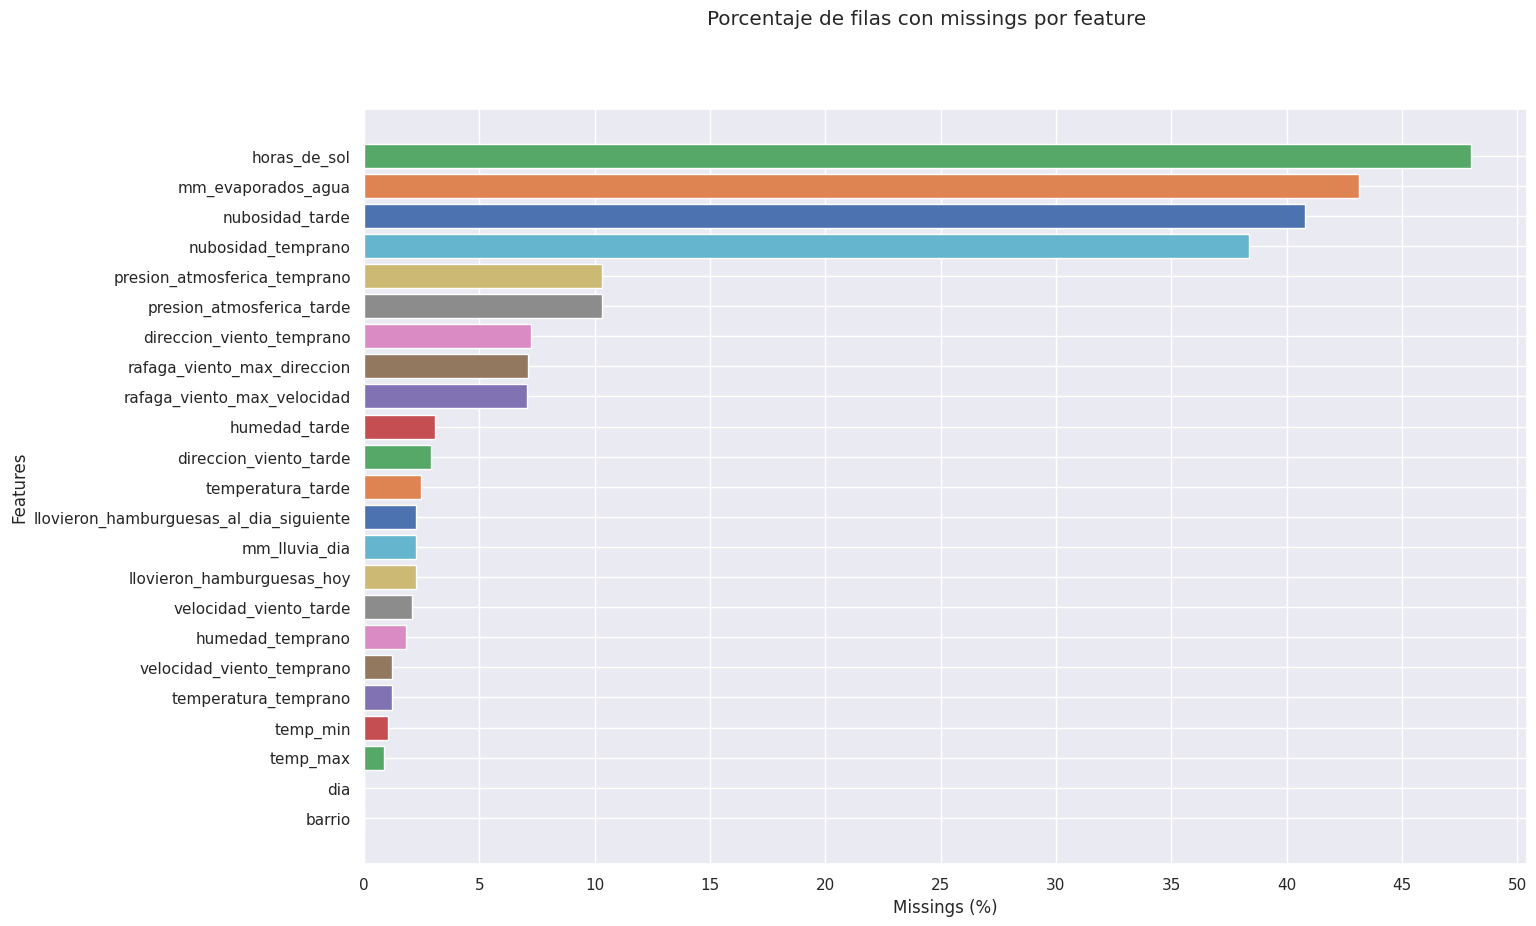

In [413]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Features")
    ax.set_xticks(range(0, 61, 5))
    fig.suptitle("Porcentaje de filas con missings por feature")
    fig.set_dpi(100)

    features_ord = sorted(dataframe.columns, key=lambda f : len(dataframe[dataframe[f].isna()]))
    for feature in features_ord:
        cant_missings = dataframe[feature].isna().mean() * 100
        ax.barh(feature, cant_missings)

plot_missings(df)

El gráfico representa el porcentaje de filas con datos faltantes por columna.
Podemos ver en el gráfico que en las columnas de día y barrio no hay ningún dato faltante. La mayoría de estos se encuentran en las columnas de *horas_de_sol*, *mm_evaporados_agua*, *nubosidad_tarde* y *nubosidad_temprano*
Resulta interesante observar que, para el caso de features asociadas a una misma variable climática, el porcentaje de missings es similar. Por ejemplo, el caso de presion_atmosferica_tarde y presion_atmosferica_temprano.
Surge la posibilidad de que los missings en dichas variables estén relacionados.

## ¿Cómo se relacionan los datos faltantes?

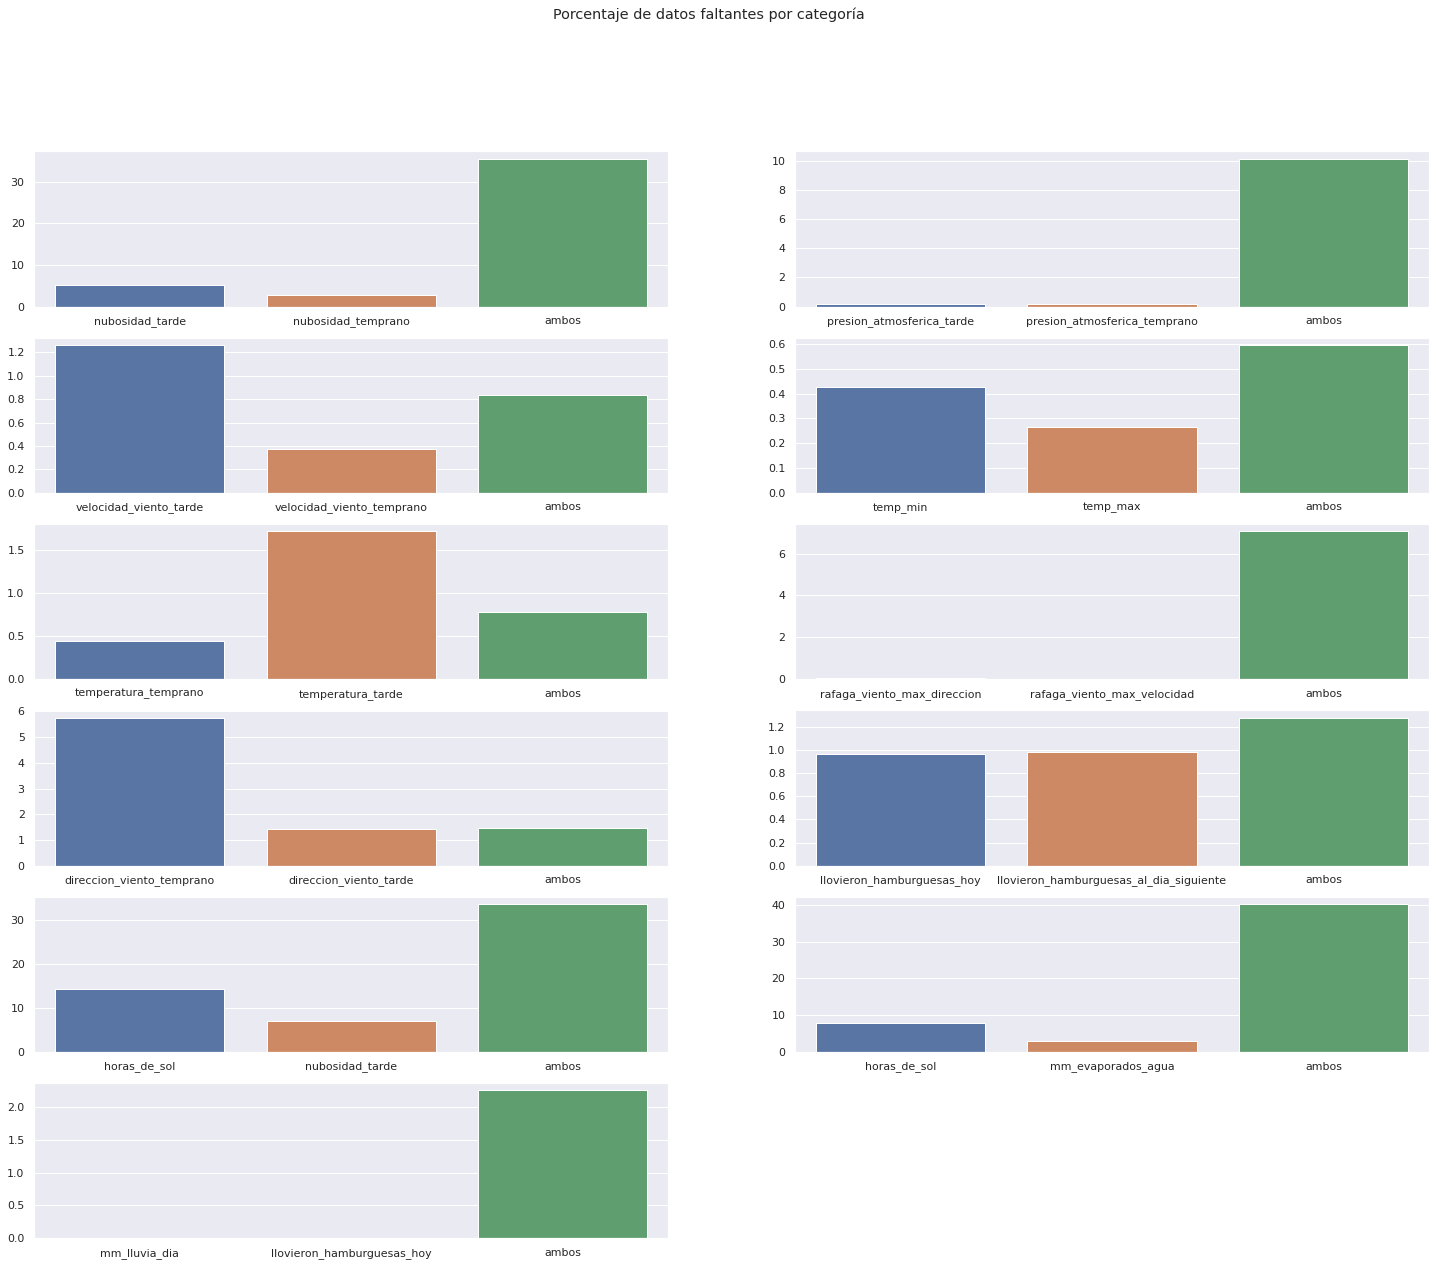

In [414]:
def mostrar_relacion_faltantes(ax, feature1, feature2):
    faltan_en_uno = df[feature1].isna().mean() * 100
    faltan_en_otro = df[feature2].isna().mean() * 100
    faltan_en_ambos = (df[feature1].isna() & df[feature2].isna()).mean() * 100
    y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
    x = [feature1, feature2, "ambos"]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
    )

pares_features = [("nubosidad_tarde", "nubosidad_temprano"),
                  ("presion_atmosferica_tarde", "presion_atmosferica_temprano"),
                  ("velocidad_viento_tarde", "velocidad_viento_temprano"),
                  ("temp_min", "temp_max"),
                  ("temperatura_temprano", "temperatura_tarde"),
                  ("rafaga_viento_max_direccion", "rafaga_viento_max_velocidad"),
                  ("direccion_viento_temprano", "direccion_viento_tarde"),
                  ("llovieron_hamburguesas_hoy", "llovieron_hamburguesas_al_dia_siguiente"),
                  ("horas_de_sol", "nubosidad_tarde"),
                  ("horas_de_sol", "mm_evaporados_agua"),
                  ("mm_lluvia_dia", "llovieron_hamburguesas_hoy")
                 ]

fig, axs = plt.subplots((len(pares_features) + 1)//2,2, figsize=(25,20))

for ax,par_feature in zip(axs.flat, pares_features):
    mostrar_relacion_faltantes(ax, par_feature[0], par_feature[1])
    #ax.set_ylabel("Porcentaje de missings (%)")
    #ax.set_xlabel("Features")

for ax in axs.flat[len(pares_features):]:
    ax.axis("off")
    
fig.suptitle("Porcentaje de datos faltantes por categoría")
plt.show()

Para los pares nubosidad, presion_atmosferica y rafaga_viento, casi en todos los casos en los que falta uno de los datos, también falta el otro. Esto es un caso de Missing At Random. Algo similar, aunque en menor proporción, ocurre con horas_de_sol, nubosidad_tarde y mm_evaporados_agua. Para el resto de los casos, no hay evidencia clara de que ocurra.
Por otro lado, vemos que hay muchos más missings en direccion_viento_temprano que en direccion_viento_tarde, y lo mismo para temperatura_tarde y temperatura_temprano. Esto despierta la sospecha de que, quizá, algunos missings están relacionados con el valor de la variable target. Para poder comprobar esta posibilidad, primero debemos saber como se distribuyen los valores de esta variable

## ¿Cómo se distribuyen los valores de la variable target?

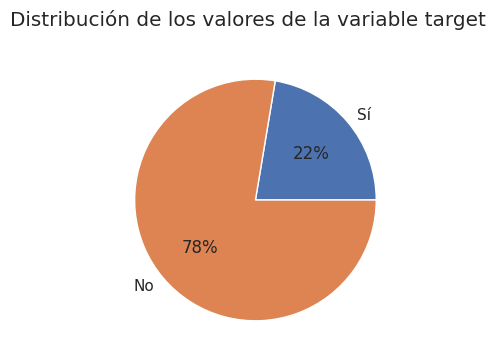

In [415]:
distribucion_target = df.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
llovio_al_dia_siguiente = distribucion_target.loc[1]
no_llovio_al_dia_siguiente = distribucion_target.loc[0]

fig, ax = plt.subplots(dpi=100)
fig.suptitle("Distribución de los valores de la variable target")
ax.pie(
    [llovio_al_dia_siguiente, no_llovio_al_dia_siguiente],
    labels=["Sí", "No"],
    autopct='%1.0f%%',
)
plt.show()

Los valores no esán distribuidos de manera uniforme, sino que en la mayoría de los casos no llovió al día siguiente. De gráficos anteriores, también sabemos que el porcentaje de missings es bastante bajo. Esta información será útil al momento de evaluar la accuracy de la baseline: si es menor a 78%, será una mala baseline, ya que una función que devuelva "no" de manera incondicional, la superaría.
Retornamos a la pregunta de la cual surgió este análisis

## ¿Los missings están relacionados con el valor de la variable target?

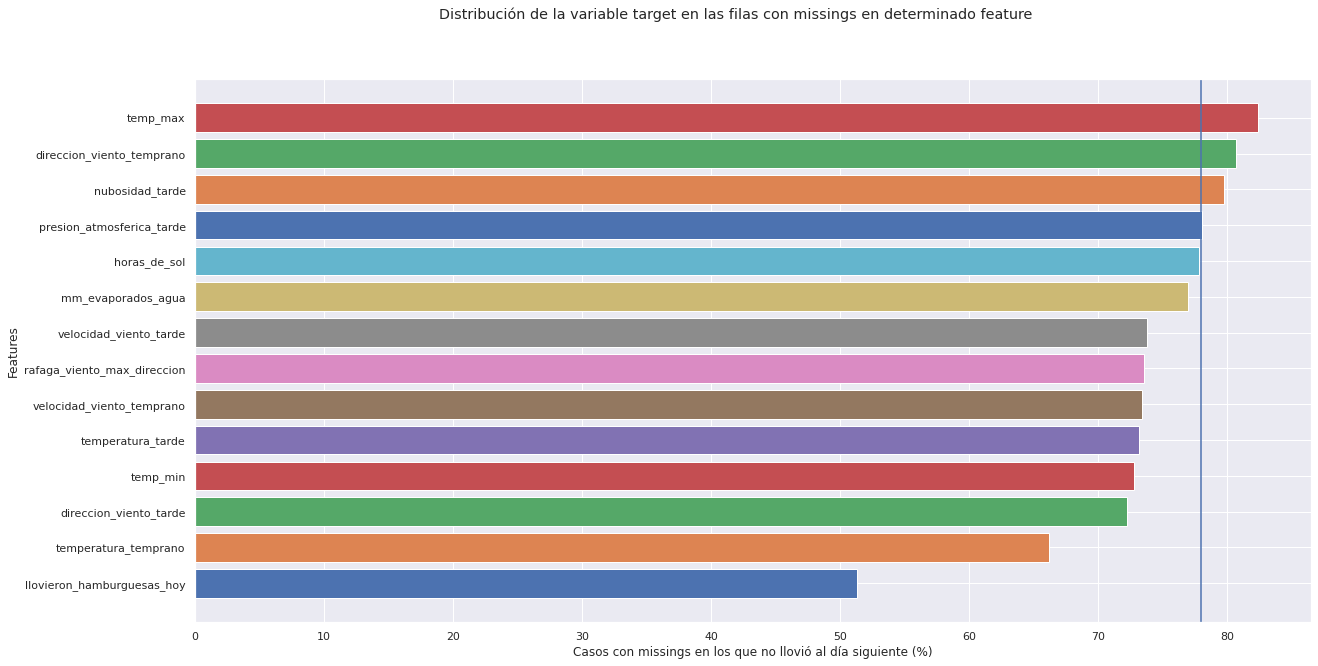

In [416]:
def graficar_relacion_missings_target(ax, feature):
    distribucion_target_en_missings = df[df[feature].isna()].llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
    x=[feature]
    y=[distribucion_target_en_missings.loc[0] * 100]
    ax.barh(x, y)

features_missings = [
    "nubosidad_tarde",
    "presion_atmosferica_tarde",
    "velocidad_viento_tarde",
    "velocidad_viento_temprano",
    "temp_min",
    "temp_max",
    "temperatura_temprano",
    "temperatura_tarde",
    "rafaga_viento_max_direccion",
    "direccion_viento_temprano",
    "direccion_viento_tarde",
    "llovieron_hamburguesas_hoy",
    "horas_de_sol",
    "mm_evaporados_agua"
]
features_missings.sort(key=lambda feature: df[df[feature].isna()].llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True).loc[0])
fig, ax = plt.subplots(figsize=(20,10))
ax.axvline(78)
ax.set_ylabel("Features")
ax.set_xlabel("Casos con missings en los que no llovió al día siguiente (%)")
fig.suptitle("Distribución de la variable target en las filas con missings en determinado feature")
for feature in features_missings:
    graficar_relacion_missings_target(ax, feature)

La linea vertical en 78% indica el valor "normal" que debería tener la feature, tal y como se analizó anteriormente. Vemos que la mayoría de features no presenta una relación evidente entre los missings y el valor de la variable target. El único valor sobresaliente es el de llovieron_hamburguesas_hoy en el cual, a primera vista, pareciera estar relacionado. Pero, como se vio anteriormente, dicha variable tiene un porcentaje de missings muy bajo, por lo cual es muy probable de que se trate de una coincidencia azarosa.

## ¿Cómo de distribuyen los valores de las variables?

### Temperaturas

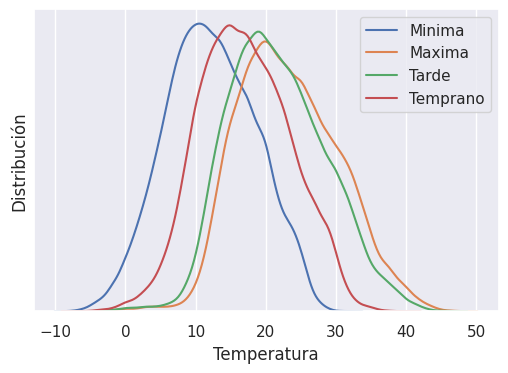

In [417]:
plt.figure(dpi=100)
plt.xlabel("Temperatura")
plt.ylabel("Distribución")
plt.yticks([])
sns.kdeplot(df.temp_min, label="Minima")
sns.kdeplot(df.temp_max, label="Maxima")
sns.kdeplot(df.temperatura_tarde, label="Tarde")
sns.kdeplot(df.temperatura_temprano, label="Temprano")
plt.legend()
plt.show()

### Presión

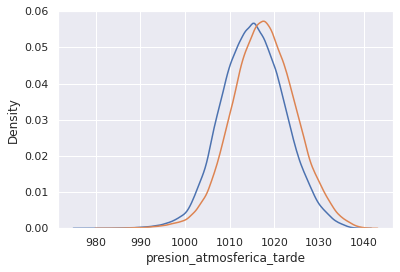

In [418]:
sns.kdeplot(df.presion_atmosferica_tarde)
sns.kdeplot(df.presion_atmosferica_temprano)
plt.show()

### Velocidad del viento

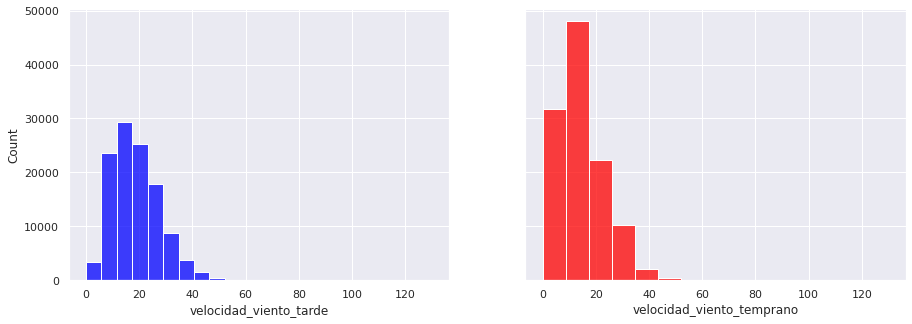

In [419]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.histplot(df.velocidad_viento_tarde, bins=15, color="blue",ax=axs[0])
sns.histplot(df.velocidad_viento_temprano, bins=15, color="red",ax=axs[1])
plt.show()

### Nubosidad

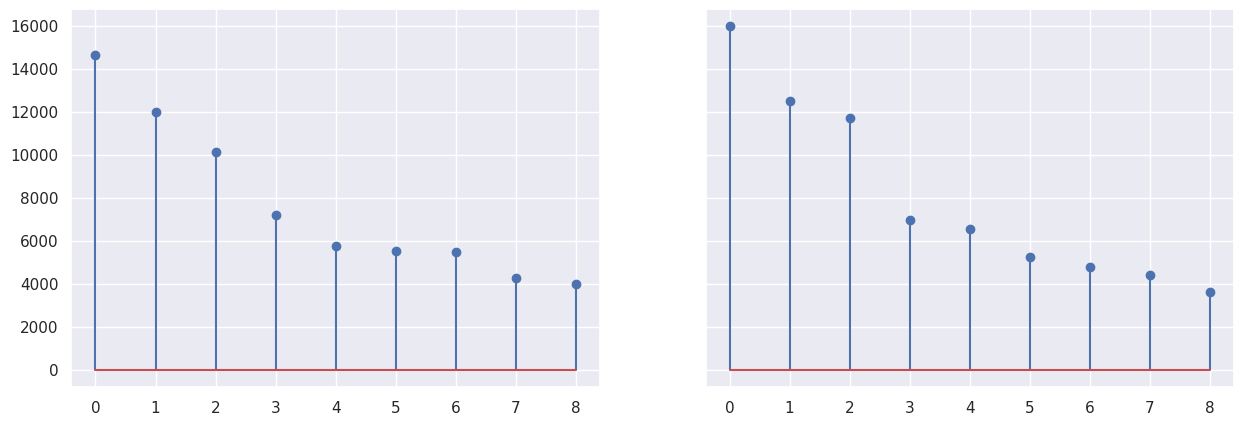

In [420]:
fig, axs = plt.subplots(1,2,dpi=100, figsize=(15,5), sharey = True)

axs[0].stem(df.nubosidad_tarde.value_counts())
axs[1].stem(df.nubosidad_temprano.value_counts())
plt.show()

### Humedad

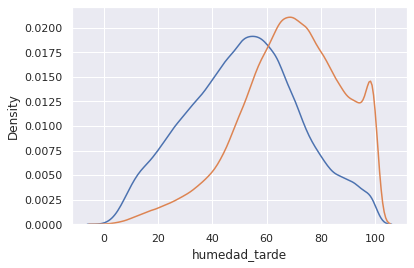

In [421]:
sns.kdeplot(df.humedad_tarde)
sns.kdeplot(df.humedad_temprano)
plt.show()

### Milimetros evaporados de agua

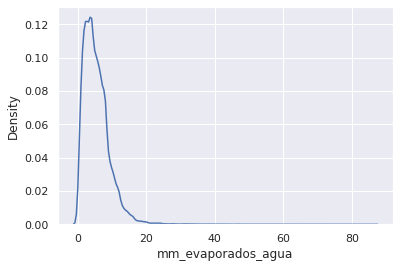

In [422]:
sns.kdeplot(df.mm_evaporados_agua)
plt.show()

### Horas de sol

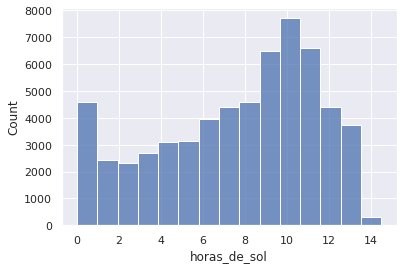

In [423]:
sns.histplot(df.horas_de_sol, bins=15)
plt.show()

### Milimetros de lluvia en el día

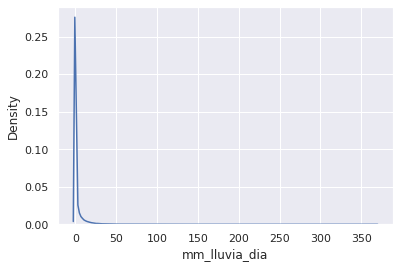

In [424]:
sns.kdeplot(df.mm_lluvia_dia)
plt.show()

In [425]:
df.mm_lluvia_dia.quantile(0.95)

13.0

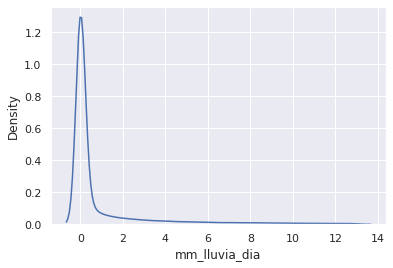

In [426]:
sns.kdeplot(df[df.mm_lluvia_dia <= 13].mm_lluvia_dia)
plt.show()

In [427]:
# SEGUIR ANALISIS

## ¿Cómo está relacionada la variable mm_lluvia_dia con llovieron_hamburguesas_hoy?

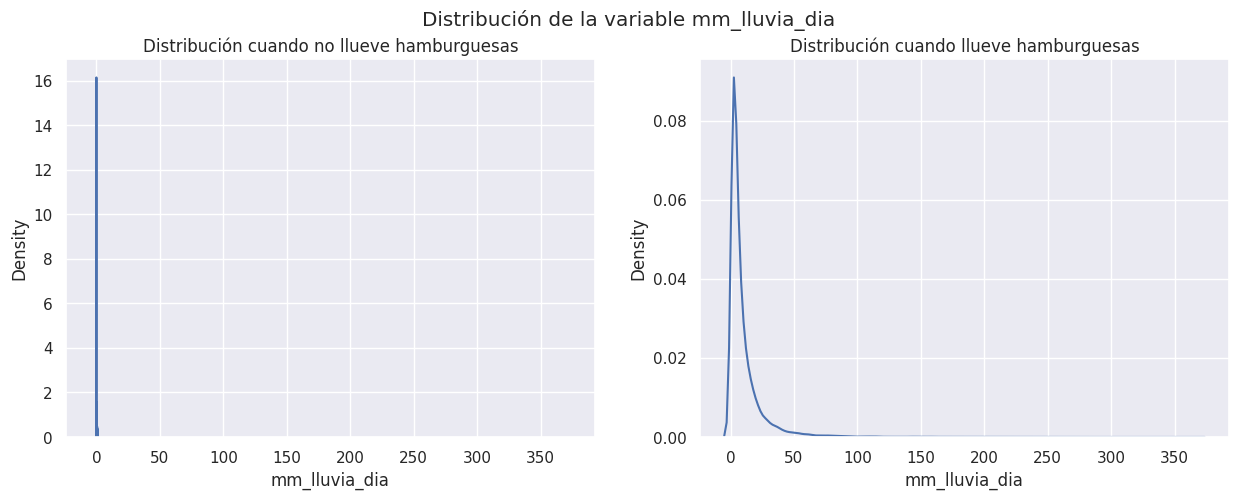

In [428]:
fig, axs = plt.subplots(1,2,dpi=100, figsize=(15,5), sharex = True)

sns.kdeplot(df[df.llovieron_hamburguesas_hoy == 0].mm_lluvia_dia, ax = axs[0])
axs[0].set_title("Distribución cuando no llueve hamburguesas")
sns.kdeplot(df[df.llovieron_hamburguesas_hoy == 1].mm_lluvia_dia, ax = axs[1])
axs[1].set_title("Distribución cuando llueve hamburguesas")
fig.suptitle("Distribución de la variable mm_lluvia_dia")
plt.show()

Podemos ver que cuando no llueve, tiende a estar muchísimo más cerca del 0 que en cualquier otro caso. Podemos contar los valores posibles para valores menores y mayores que 1:

In [429]:
df[df.mm_lluvia_dia <= 1].llovieron_hamburguesas_hoy.value_counts()

0.0    88356
Name: llovieron_hamburguesas_hoy, dtype: int64

In [430]:
df[df.mm_lluvia_dia > 1].llovieron_hamburguesas_hoy.value_counts()

1.0    25392
Name: llovieron_hamburguesas_hoy, dtype: int64

La columna llovieron_hamburguesas_hoy es completamente dependiente de mm_lluvia_dia, entonces podemos dropearla sin pérdida de información

In [431]:
df.drop(columns=["llovieron_hamburguesas_hoy"], inplace=True)

## ¿Qué pares de variables tienen mayor covarianza? ¿Es posible combinar features?

In [432]:
pares_ord_cov = df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
pares_ord_cov = pares_ord_cov[pares_ord_cov < 1]
display(pares_ord_cov.to_frame("|Covarianza|").head(8))

|Covarianza|
temperatura_tarde         temp_max                          0.984493
presion_atmosferica_tarde presion_atmosferica_temprano      0.961457
temperatura_temprano      temp_min                          0.901971
                          temp_max                          0.887330
                          temperatura_tarde                 0.860744
temp_min                  temp_max                          0.737075
                          temperatura_tarde                 0.709390
nubosidad_tarde           horas_de_sol                      0.703245

Las variables de temperatura parecen estar bastante relacionadas entre sí, en especial temperatura_tarde y temp_max. También presion_atmosferica_tarde y presion_atmosferica_temprano. Para observar estas relaciones, podemos graficar los respectivos scatterplots. Podemos aprovechar el gráfico, además, para analizar posibles relaciones con la variable target

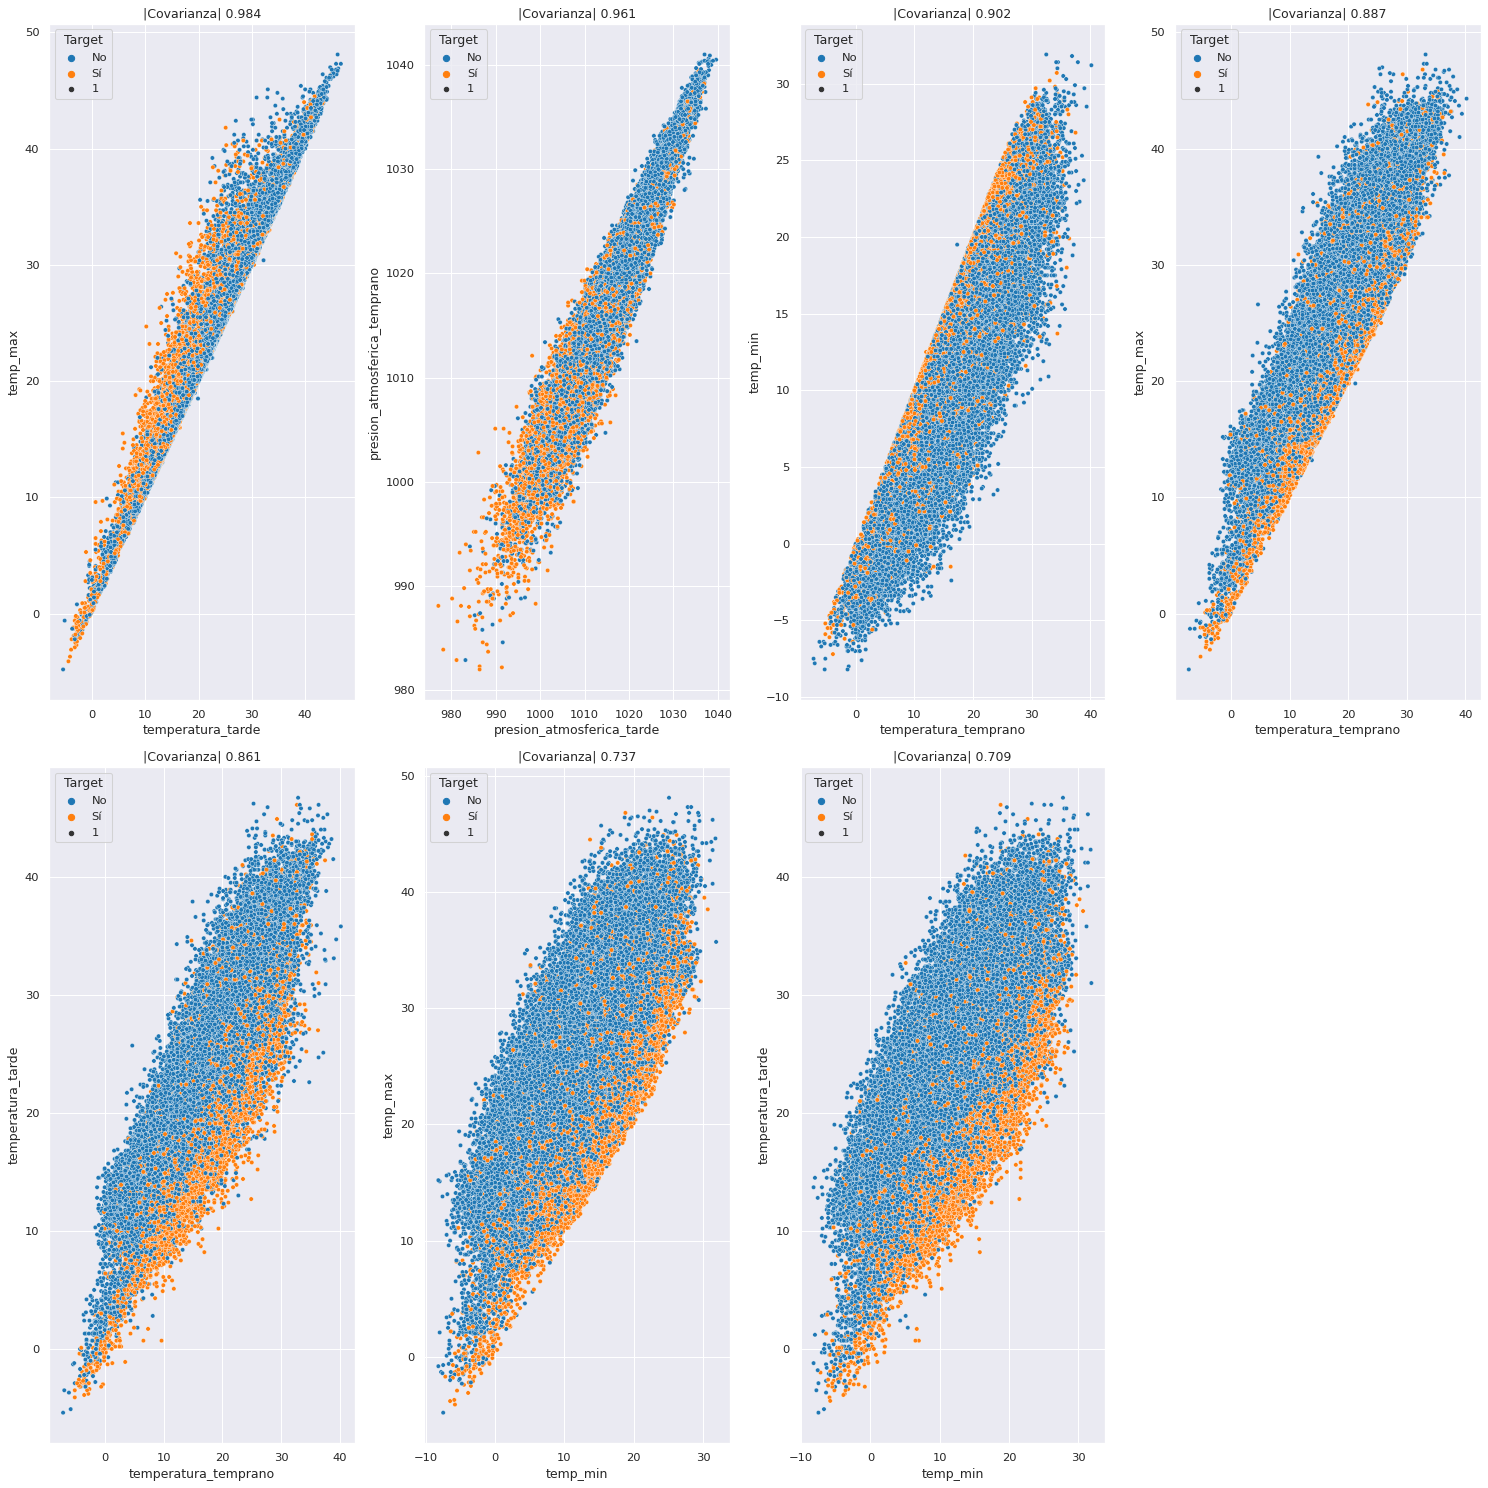

In [433]:
fig, axs = plt.subplots(2, 4, figsize=(20,20))
fig.set_dpi(75)
for cov, ax in zip(pares_ord_cov.index[:7], axs.flat):
    ax.set_title(f"|Covarianza| {pares_ord_cov[cov]:.3f}")
    g= sns.scatterplot(
        x=cov[0],
        y=cov[1],
        hue="llovieron_hamburguesas_al_dia_siguiente",
        palette="tab10",
        data=df.replace({variable_target: {1: "Sí", 0: "No"}}),
        ax=ax,
        size=1,
    )
    ax.legend(title="Target")
axs.flat[-1].axis("off")
plt.tight_layout()
plt.show()

Podemos también graficar las temperaturas por día

[]

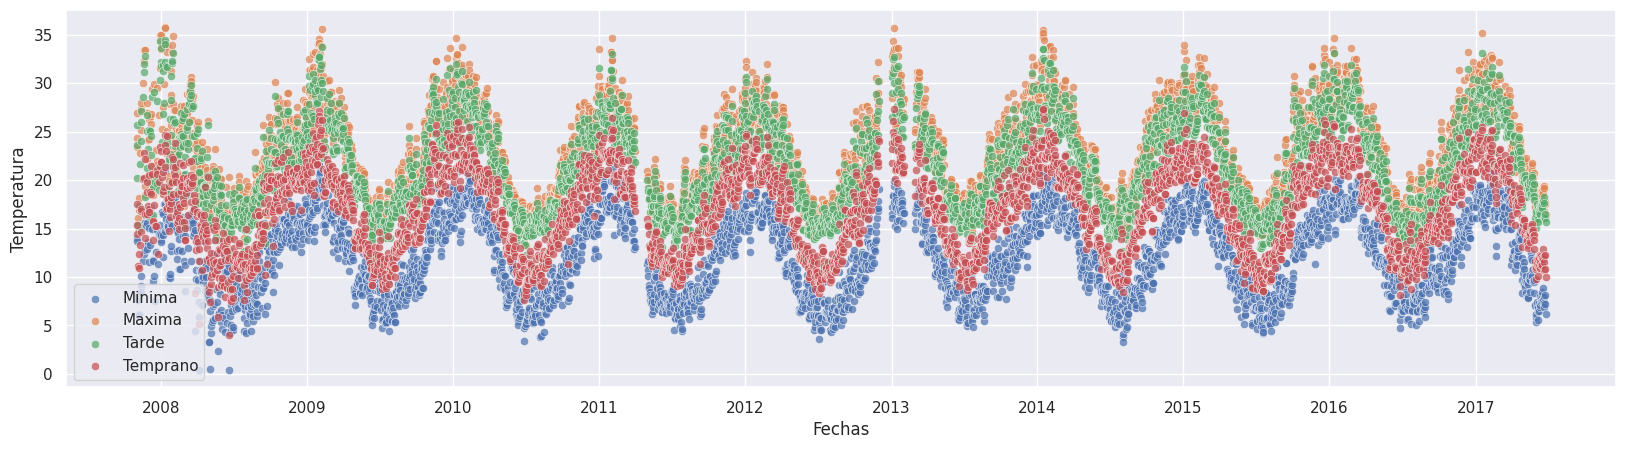

In [434]:
grupo = df.groupby("dia").agg("mean").reset_index()
fig, ax = plt.subplots(dpi=100, figsize=(20,5))

ax.set_ylabel("Temperatura")
ax.set_xlabel("Fechas")
sns.scatterplot(x="dia", y="temp_min", data=grupo, label="Minima", alpha=0.7)
sns.scatterplot(x="dia", y="temp_max", data=grupo, label="Maxima", alpha=0.7)
sns.scatterplot(x="dia", y="temperatura_tarde", data=grupo, label="Tarde", alpha=0.7)
sns.scatterplot(x="dia", y="temperatura_temprano", data=grupo, label="Temprano", alpha=0.7)
plt.plot()

Podemos ver claramente la variación de la temperatura con las estaciones del año.

## Que rows con datos faltantes podemos dropear sin perder muchos datos?

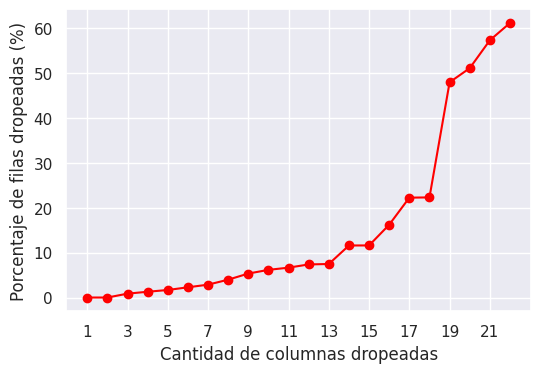

In [435]:
x = range(1, len(df.columns) + 1)
y = []

features_ord = sorted(df.columns, key=lambda f : len(df[df[f].isna()]))
for i in x:
    df_drop = df_original.loc[df_original[features_ord[:i]].dropna().index]
    y.append((1 - len(df_drop)/len(df_original))*100)

plt.figure(dpi=100)
plt.ylabel("Porcentaje de filas dropeadas (%)")
plt.xlabel("Cantidad de columnas dropeadas")
plt.plot(x, y, "o-", color = 'red')
plt.xticks(x[::2])
plt.show()

Este gráfico representa el porcentaje de samples que perdemos del total al dropear las últimas $n$ features con menos datos faltantes del dataset.
Decidimos dropear los samples con NaN de las 16 features con menos porcentaje de datos faltantes.

In [436]:
#print(f"Porcentaje de samples perdidos: {y[15] : .2f}%")
#df = df.loc[df_original[features_ord[:16]].dropna().index]
#plot_missings(df)

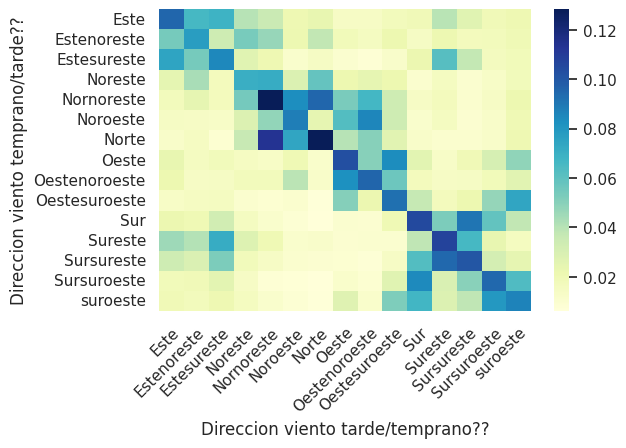

In [437]:
direcciones = df.direccion_viento_tarde.dropna().unique().sort_values()

d = {}
for direccion_tarde in direcciones:
    d[direccion_tarde] = {}
    for direccion_temprano in direcciones:
        ambos = df[(df["direccion_viento_tarde"] == direccion_tarde) & (df["direccion_viento_temprano"] == direccion_temprano)]
        al_menos_uno = df[(df["direccion_viento_tarde"] == direccion_tarde) | (df["direccion_viento_temprano"] == direccion_temprano)]
        d[direccion_tarde][direccion_temprano] = len(ambos) / len(al_menos_uno)

fig, ax = plt.subplots()
fig.set_dpi(100)
sns.heatmap(pd.DataFrame(d), cmap="YlGnBu")
ax.set_xlabel("Direccion viento tarde/temprano??")
ax.set_ylabel("Direccion viento temprano/tarde??")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

## ¿Cómo afecta la dirección del viento a la lluvia?

Para ver esto, decidimos representar cada dirección del viento como un ángulo. Ignoramos aquellas que no tienen la dirección especificada.
Graficamos la distribución de samples en cada dirección en general y con la variable target.

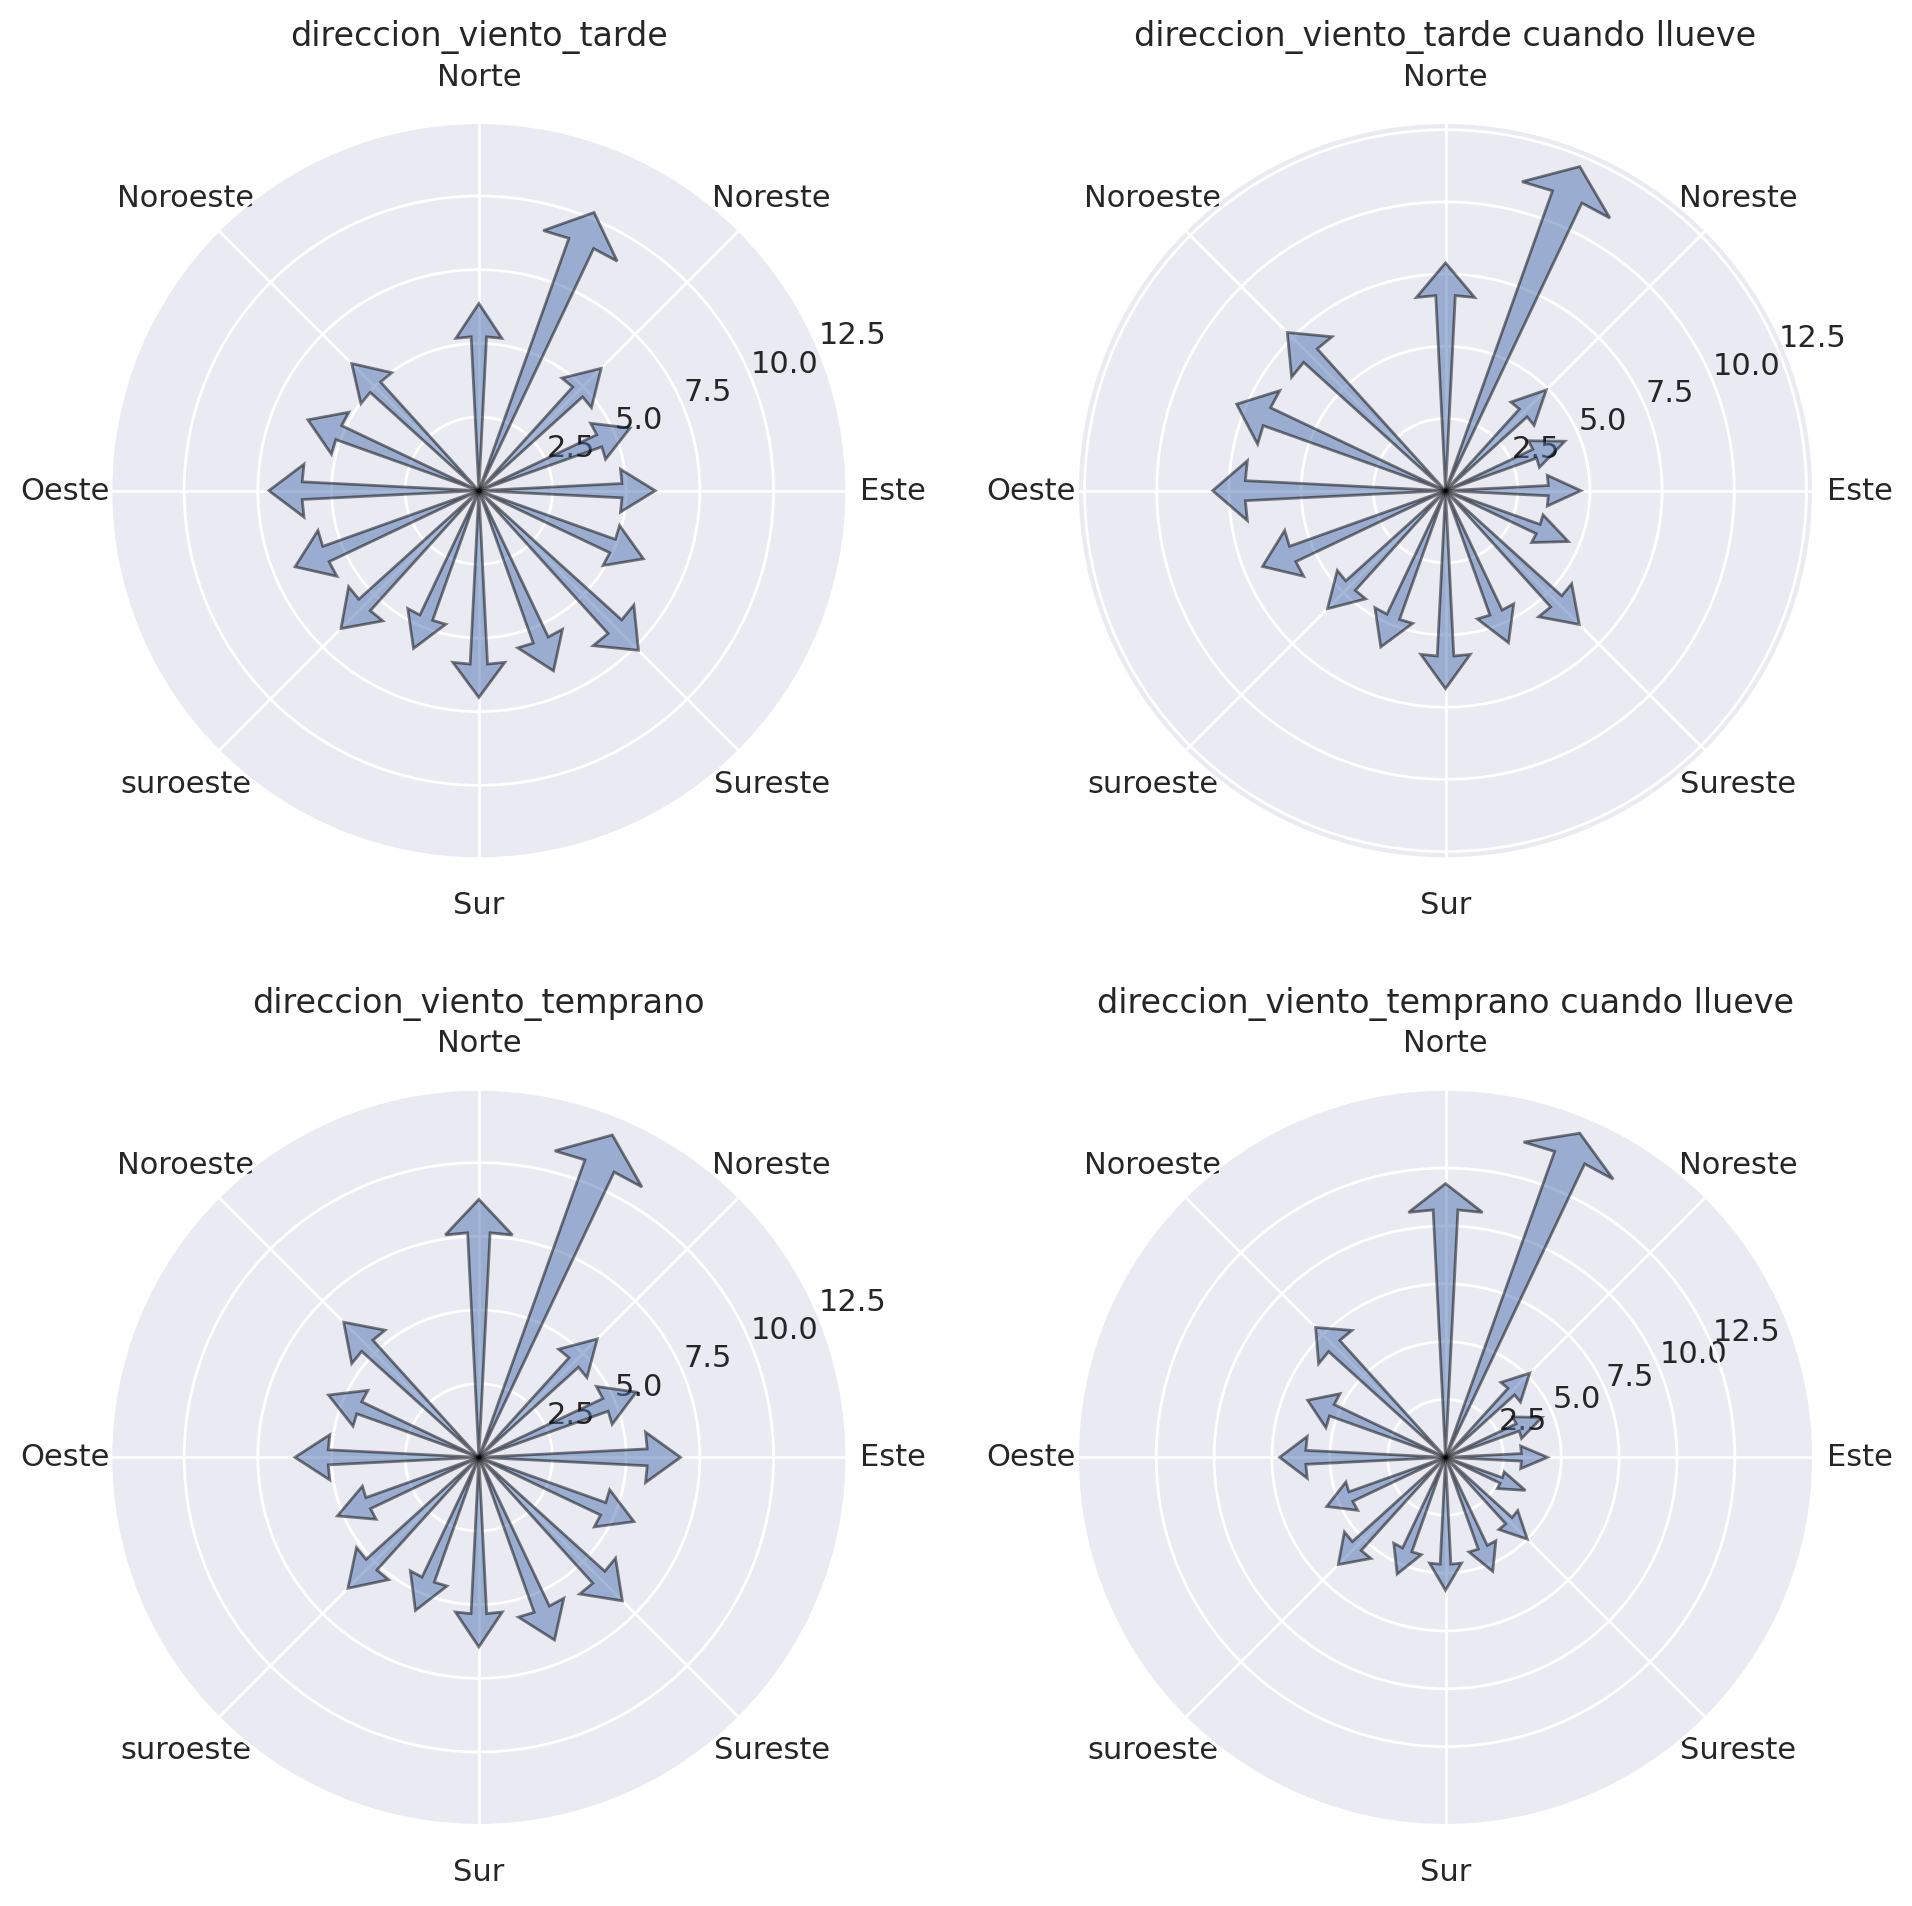

In [583]:
direcciones = {
        'Norte' : 4*np.pi/8,
        'Nornoreste' : 3*np.pi/8,
        'Noreste' : 2*np.pi/8,
        'Estenoreste' : np.pi/8,
        'Este' : 0,
        'Estesureste' : 15*np.pi/8,
        'Sureste' : 14*np.pi/8,
        'Sursureste' : 13*np.pi/8,
        'Sur' : 12*np.pi/8,
        'Sursuroeste' : 11*np.pi/8,
        'suroeste' : 10*np.pi/8,
        'Oestesuroeste' : 9*np.pi/8,
        'Oeste' : 8*np.pi/8,
        'Oestenoroeste' : 7*np.pi/8,
        'Noroeste' : 6*np.pi/8,
        'Nornoroeste' : 5*np.pi/8,
}

def graficar_viento(feature, ax, filtrar_target = False):
    if filtrar_target:
        cont = df[df[variable_target] == 1][feature].value_counts(normalize = True)
        ax.set_title(feature + " cuando llueve")
    else:
        cont = df[feature].value_counts(normalize = True)
        ax.set_title(feature)
        
    for direccion in direcciones:
        if direccion in cont:
            arr = ax.arrow(direcciones[direccion], 0, 0, cont[direccion] * 40, alpha = 0.5, width = 0.1, 
            edgecolor = 'black', length_includes_head = True)
    ax.set_yticks(range(1, 6))
    ax.set_yticklabels([2.5*i for i in range(1, 6)]) # Para ajustar la escala de nuevo a la correcta y ponerlo en %
    ax.set_xticks([i*np.pi/4 for i in range(8)])
    ax.set_xticklabels(sorted(direcciones.keys(), key = lambda x: direcciones[x])[::2])

fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), dpi = 200, figsize = (10, 10))
graficar_viento("direccion_viento_tarde", ax = axs[0][0])
graficar_viento("direccion_viento_temprano", ax = axs[1][0])
graficar_viento("direccion_viento_tarde", ax = axs[0][1], filtrar_target = True)
graficar_viento("direccion_viento_temprano", ax = axs[1][1], filtrar_target = True)
fig.tight_layout(pad = 2)
plt.show()

Podemos notar que no parece haber una gran diferencia cuando llueve hamburguesas que cuando no. Pareciera que en ambos casos disminuyeron levemente los vientos en dirección entre Sur y Este y aumentaron las más cercanas al Norte, pero no parece ser un cambio muy significativo como para considerarlo relevante.

## ¿Cómo varían las distintas features numéricas cuando llueven hamburguesas al día siguiente?

Vamos a gráficar un box plot por variable numérica comparando su distribución todos los días vs. los días anteriores a cuando llueve hamburguesas

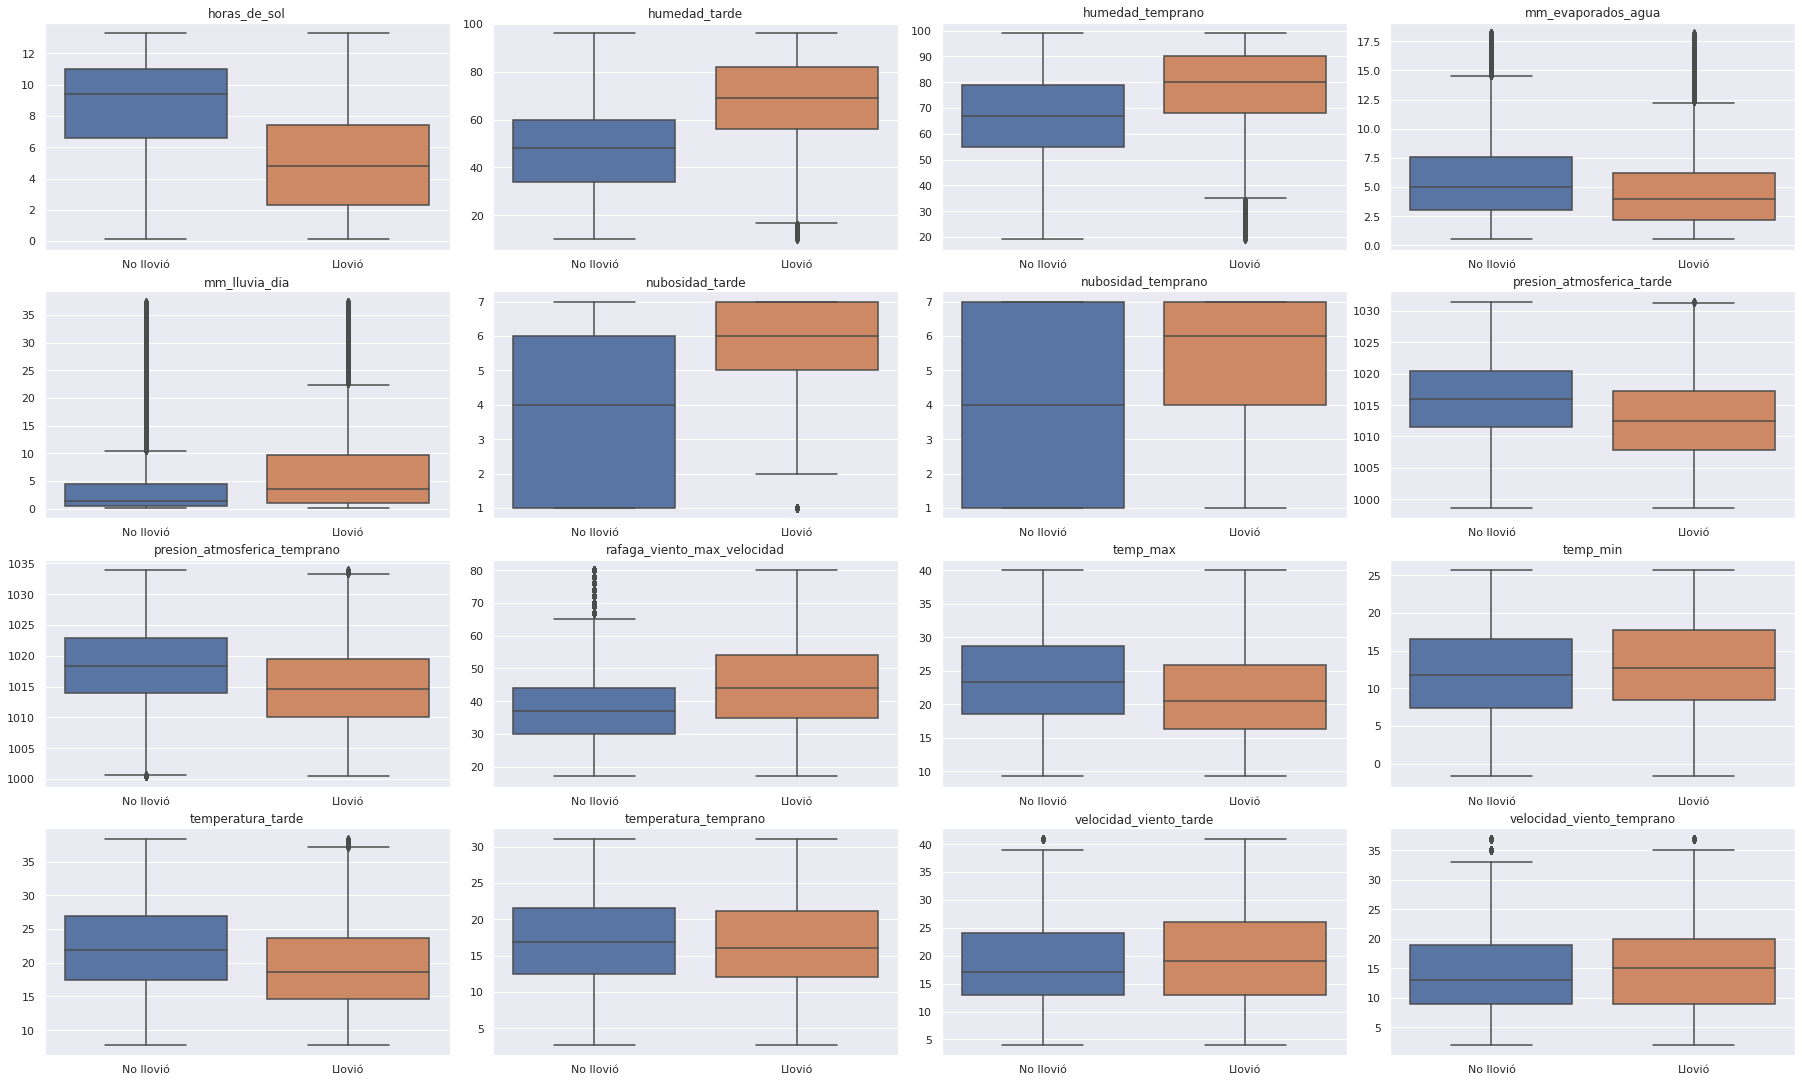

In [439]:
features_num = ['horas_de_sol', 'humedad_tarde', 'humedad_temprano', 'mm_evaporados_agua', 'mm_lluvia_dia',
                'nubosidad_tarde', 'nubosidad_temprano', 'presion_atmosferica_tarde',
                'presion_atmosferica_temprano', 'rafaga_viento_max_velocidad', 'temp_max',
                'temp_min', 'temperatura_tarde', 'temperatura_temprano', 'velocidad_viento_tarde',
                'velocidad_viento_temprano']

fig, axs = plt.subplots((len(features_num) + 3)//4, 4, figsize=(25,15))
#fig.set_dpi(50)

#Otra alternativa, las conclusiones no son tan claras
df["all"] = ""
for ax, feature in zip(axs.flat, features_num):
    ax.set_title(feature)
    # Truncamos el dataset para sacar outliers y obtener gráficos más claros
    df_trunc = df[(df[feature] < df[feature].quantile(0.99)) & (df[feature] > df[feature].quantile(0.01))]
    sns.boxplot(
        ax=ax,
        #x="all",
        x="llovieron_hamburguesas_al_dia_siguiente",
        y=feature,
        data=df_trunc,
        #palette="muted",
        #split=True\
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_xlabel("¿Llovieron hamburguesas al día siguiente?")
    ax.set_xticklabels(["No llovió", "Llovió"])
    #ax.legend().remove()

for ax in axs.flat[len(features_num):]:
    ax.axis("off")

fig.tight_layout(pad=0.5)
plt.show()

Se observa que las variables de horas_de_sol, así como las de humedad y nubosidad, son las más relacionadas con la variable target a primera vista.
Parece que, en el 75% de los días en que llovió al día siguiente, horas_de_sol fuenor a 8, y en el 75% de los días en que no llovió, horas_de_sol fue mayor a 6. Hay que tener en cuenta, sin embargo, que horas_de_sol se trata de la variable con más missings del dataset. En este caso, la relación parece lo suficientemente marcada como para considerar la variable a pesar de ello.
Para humedad_tarde y humedad_temprano, ambos valores son significativamente más altos en los casos en que llovió. Dichas variables tenían pocos missings, por lo que podría ser un buen criterio de predicción.
Lo mismo sucede con la nubosidad, cuya media es más alta los días previos a la lluvia.

Podemos entonces hacer un gráfico de densidad diferenciando entre cuando llueve y cuando no para esas features:

In [447]:
def graf_prob_discreta(feature, ax):
    df_llovio = df[df[variable_target] == 1]
    df_no_llovio = df[df[variable_target] == 0]
    df_no_llovio = df_no_llovio[feature]\
    .value_counts(normalize = True).to_frame().reset_index()
    df_no_llovio["llovio"] = "Cuando no llueve"
    
    df_llovio = df_llovio[feature]\
    .value_counts(normalize = True).to_frame().reset_index()
    df_llovio["llovio"] = "Cuando llueve"
    
    df_a_usar = pd.concat((df_llovio, df_no_llovio))
    sns.barplot(x='index',
                y=feature,
                data=df_a_usar,
                hue="llovio",
                ax = ax,
                hue_order=["Cuando no llueve", "Cuando llueve"]
    )
    ax.set_title(f"Frecuencia relativa de {feature}\nsegún variable target")
    ax.set_ylabel("Frecuencia relativa")
    ax.set_xlabel(feature)
    
def graf_prob_continua(feature, ax):
    df_llovio = df[df[variable_target] == 1]
    df_no_llovio = df[df[variable_target] == 0]
    sns.kdeplot(
        x=feature,
        data=df_no_llovio[df_no_llovio[feature] < df_no_llovio[feature].quantile(0.9)],
        label = f"Cuando no llueve",
        ax = ax
    )
    sns.kdeplot(
        x=feature,
        data=df_llovio[df_llovio[feature] < df_llovio[feature].quantile(0.9)],
        label = f"Cuando llueve",
        ax = ax
    )
    ax.set_title(f"Densidad de {feature}\nsegún variable target")
    
def graf_cant_continua(feature, ax, xlim = None, ylim = None):
    df_llovio = df[df[variable_target] == 1]
    df_no_llovio = df[df[variable_target] == 0]
    serie_no_llovio = df_no_llovio[feature].value_counts()
    serie_llovio = df_llovio[feature].value_counts()
    ax.plot(serie_no_llovio.index, serie_no_llovio.values, '.')
    ax.plot(serie_llovio.index, serie_llovio.values, '.')
    ax.set_title(f"Cantidad de {feature}\nsegún variable target")
    ax.set_ylabel("Cantidad")
    ax.set_xlabel(feature)
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

def graf_cant_discreta(feature, ax):
    sns.countplot(data=df, x=feature, hue=variable_target, hue_order=[0, 1])
    ax.set_title(f"Cantidad de {feature}\nsegún variable target")
    ax.set_ylabel("Cantidad")
    ax.set_xlabel(feature)

def graficar_diferencia_target(feature, discreta = False):
    fig, axs = plt.subplots(1, 2, dpi=100, figsize=(10,3))
    if discreta:
        graf_prob_discreta(feature, axs[0])
        graf_cant_discreta(feature, axs[1])
    else:
        graf_prob_continua(feature, axs[0])
        graf_cant_continua(feature, axs[1])

    axs[0].set_xlim(df[feature].min())
    axs[0].set_yticks([])
    axs[0].legend()
    axs[1].legend(labels=['Cuando no llueve', 'Cuando llueve'])

    plt.tight_layout(h_pad = 5)
    plt.plot()

#### Horas de sol

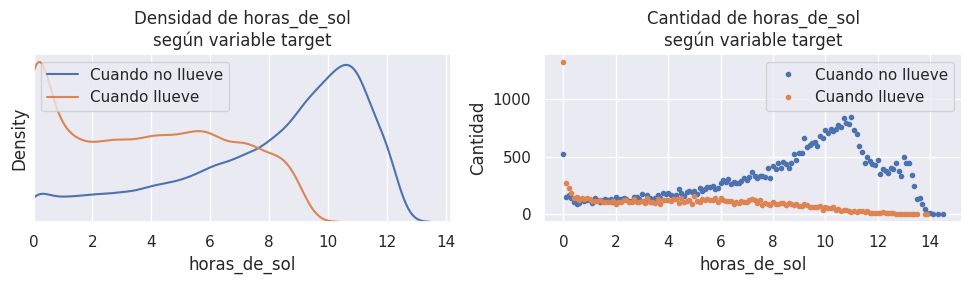

In [441]:
graficar_diferencia_target("horas_de_sol")

Como hay tantos samples donde no llueve al día siguiente, la cantidad total de samples en las que llueve y no llueve con pocas horas de sol es similar, pero en general aquellos días en los que va a llover al día siguiente tienden a tener pocas horas de sol.
La mayor diferencia se nota con horas de sol entre 0 y 1, donde ya la densidad de casos positivos tiene un pico e incluso hay más samples positivos con esa condición en el dataset que negativos.

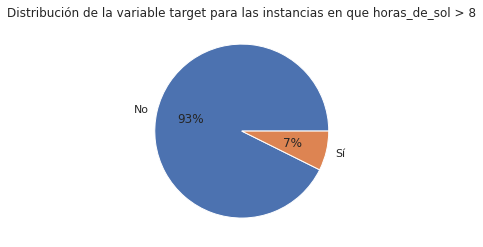

In [442]:
df_mucho_sol = df[df.horas_de_sol > 8]
plt.pie(df_mucho_sol.llovieron_hamburguesas_al_dia_siguiente.value_counts(),
        autopct='%1.0f%%',
       labels=["No", "Sí"])
plt.title("Distribución de la variable target para las instancias en que horas_de_sol > 8")
plt.show()

Podemos ver también que si las horas de sol son mayores a 8, solo en el 7% de los casos llueve al día siguiente.

In [443]:
print(f"Porcentaje de instancias que son clasificadas por este criterio: {len(df_mucho_sol) / len(df) * 100 : .1f}%")

Porcentaje de instancias que son clasificadas por este criterio:  27.8%


Este criterio resulta ser útil para clasificar un buen porcentaje de las muestras.

#### Humedad

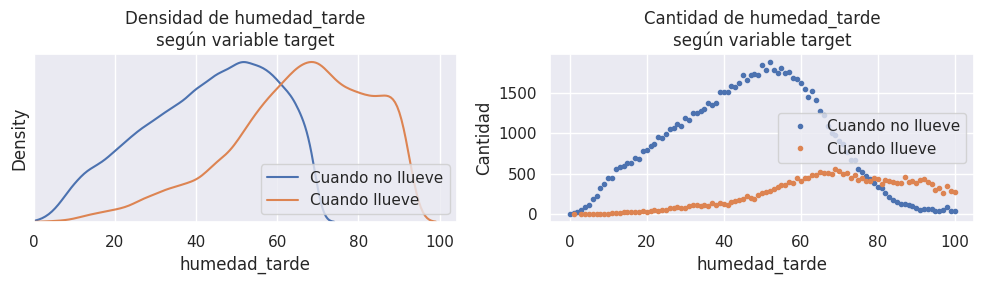

In [444]:
graficar_diferencia_target("humedad_tarde")

Nuevamente podemos notar una relación bastante clara, donde aquellos samples donde no hay lluvia al día siguiente tienden a concentrarse cerca de los 50 de humedad mientras que donde si llueve alrededor de los 70 o más.
A partir de humedad alrededor de 80, ya empiezan a ser más los casos con lluvia al día siguiente que los que no.

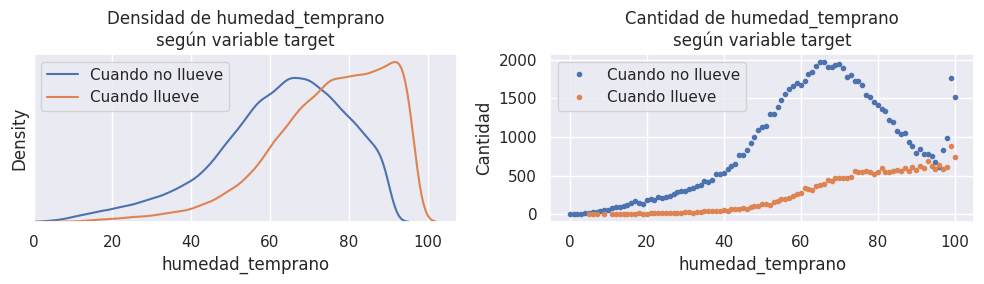

In [445]:
graficar_diferencia_target("humedad_temprano")

En este caso, nuevamente tiende la humedad cuando llueve a ser mayor a la de los días que no llueve. De todas maneras, si vemos la cantidad de samples en ambos casos, parecería que siempre es mayor la cantidad de días que no llueve que las que sí para cualquier humedad, por lo que a priori no podemos utilizar esta feature para filtrar de manera sencilla.

#### Nubosidad

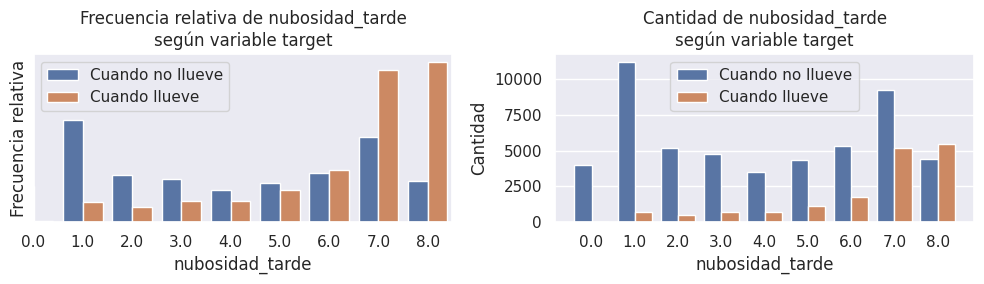

In [448]:
graficar_diferencia_target("nubosidad_tarde", discreta = True)

Otra vez podemos encontrar una relación con la variable target muy rapidamente. Los días que no llueve tienden a tener una nubosidad más baja que los días en los que llueve.
Podemos notar que para los días con nubosidad de 8, hay más samples en los que llueve al día siguiente que en los que no, y aparentemente no hay ningún día en el que llueva al día siguiente con nubosidad 0.

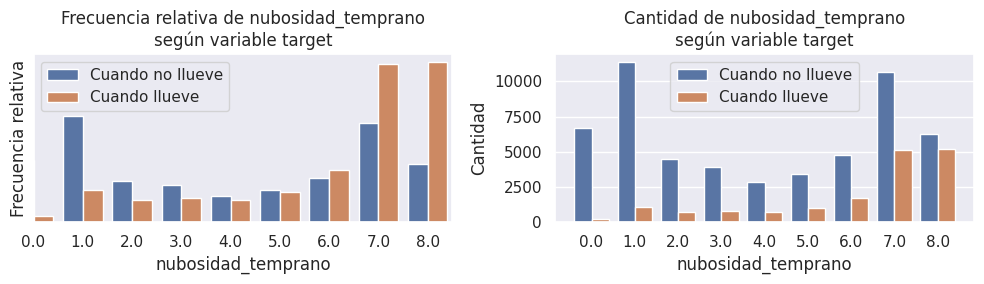

In [449]:
graficar_diferencia_target("nubosidad_temprano", discreta = True)

Para la nubosidad de la mañana, también se nota un incremento en nubosidad con valores altos en la distribución de los días cuando llueve, pero aún así para toda nubosidad hay más samples en los que no llueve, por lo que no nos va a servir para detectar casos de lluvia de manera sencilla.

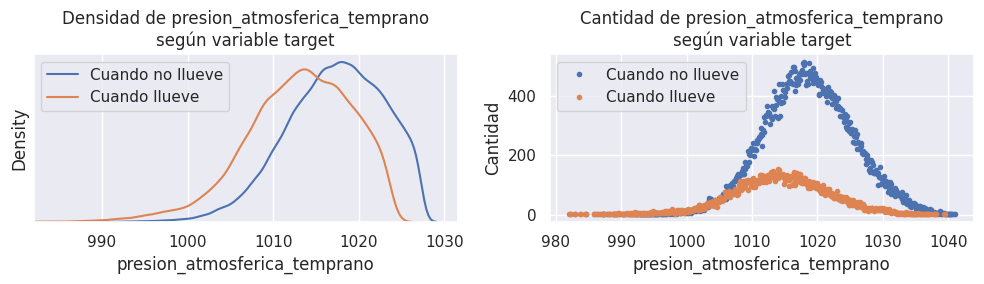

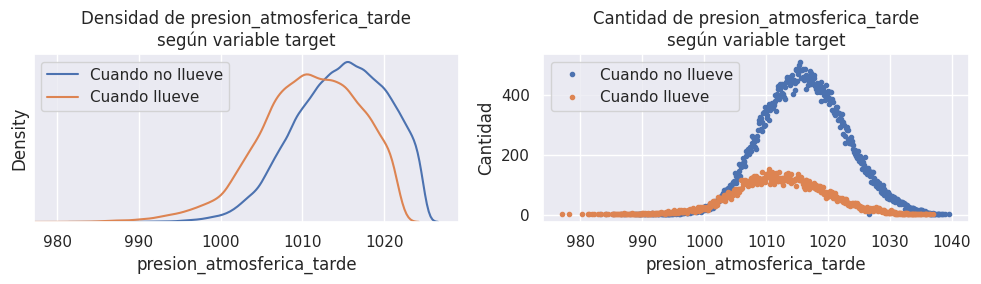

In [450]:
graficar_diferencia_target("presion_atmosferica_temprano")
graficar_diferencia_target("presion_atmosferica_tarde")

Para el caso de la presión, esta tiende a ser levemente menor cuando va a haber lluvia al día siguiente. Se puede apreciar levemente en los gráficos que para presiones menores a 1000 parecería ser superior la cantidad de veces que llovió que las que no. Podemos hacer un poco de zoom en los gráficos de la derecha:

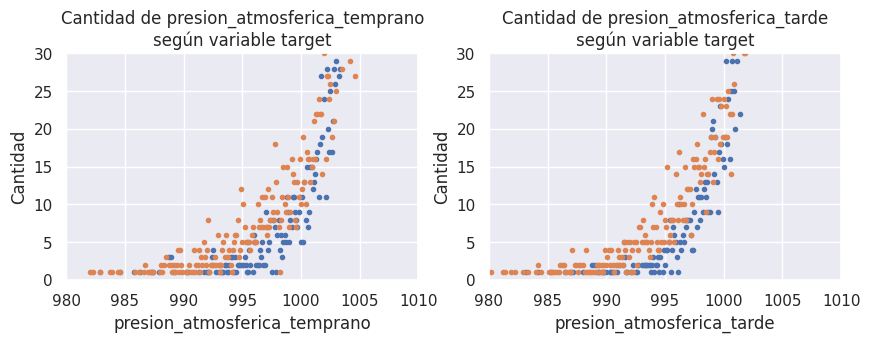

In [451]:
fig, axs = plt.subplots(1, 2, dpi=100, figsize=(10,3))
graf_cant_continua("presion_atmosferica_temprano", axs[0], xlim = (980, 1010), ylim = (0, 30))
graf_cant_continua("presion_atmosferica_tarde", axs[1], xlim = (980, 1010), ylim = (0, 30))
plt.show()

En efecto, aproximadamente para presiones menores a 1000 suele ser superior la cantidad de samples en las que llovió al día siguiente. De todas formas no es un dato muy significante ya que la cantidad total de puntos que cumplen esto es bastante reducida.

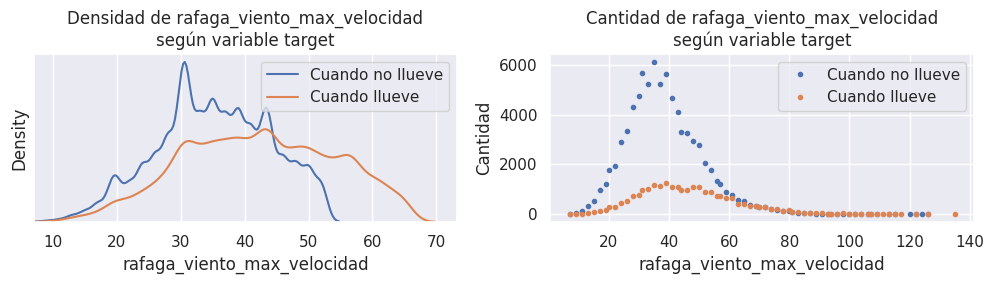

In [452]:
graficar_diferencia_target("rafaga_viento_max_velocidad")

A partir del gráfico de densidad podemos ver que los días positivos tienen una máxima velocidad más alta en promedio.

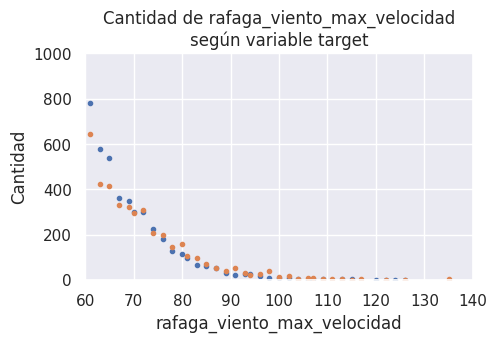

In [453]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5,3))
graf_cant_continua("rafaga_viento_max_velocidad", ax, xlim = (60, 140), ylim = (0, 1000))
plt.show()

Haciendo un poco de zoom, podemos ver que para valores mayores a 80 hay más filas donde llovió al día siguiente que para aquellos que no.

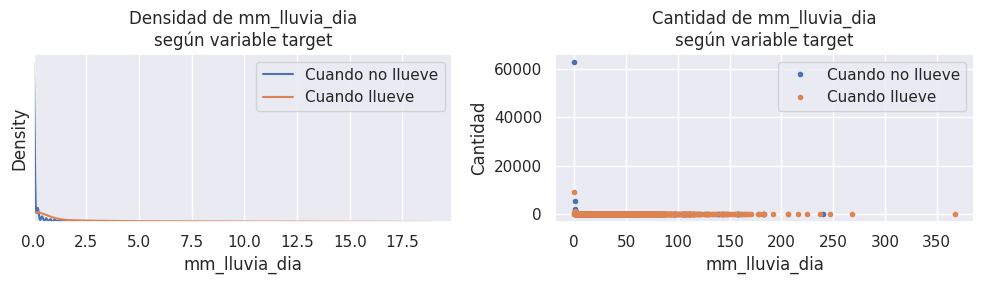

In [596]:
graficar_diferencia_target("mm_lluvia_dia")

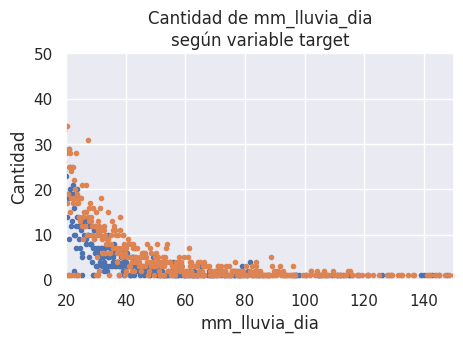

In [619]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5,3))
graf_cant_continua("mm_lluvia_dia", ax, xlim = (20, 150), ylim = (0, 50))
plt.show()

## ¿Hay variables que se relacionan entre sí?

Podemos también hacer algunos scatters plot de variables que parecen relacionadas para ver si notamos algun patrón cuando llueven hamurguesas.

In [497]:
def graficar_scatter(pareja, dataframe, puntos_extra = None):
    plt.figure(dpi=100)
    sns.scatterplot(
        x=pareja[0],
        y=pareja[1],
        hue='llovieron_hamburguesas_al_dia_siguiente',
        data=dataframe,
        alpha=0.7,
        size=1,
    )

    plt.legend(title="Llovió hamburguesas\nal día siguiente")
    plt.xlabel(pareja[0])
    plt.ylabel(pareja[1])
    
    if puntos_extra is not None:
        plt.plot(puntos_extra[0], puntos_extra[1], color = 'red')
    
    plt.show()

### Velocidad del viento

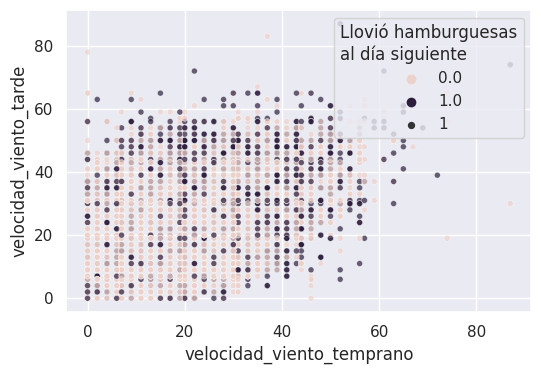

In [498]:
graficar_scatter(('velocidad_viento_temprano', 'velocidad_viento_tarde'), df)

A primera vista, no parece haber ninguna relación fácil de detectar con estos parámetros para predecir si va a llover hamburguesas al día siguiente.

### Humedad

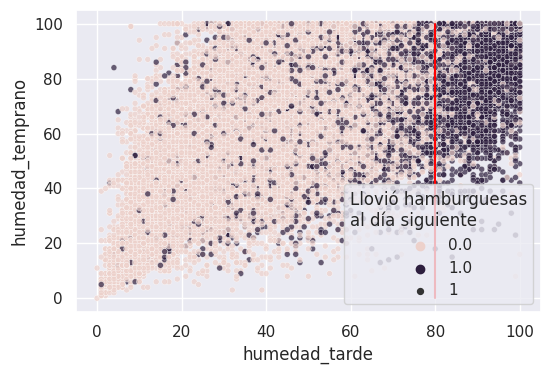

In [499]:
graficar_scatter(('humedad_tarde', 'humedad_temprano'), df, puntos_extra = ([80, 80], [0, 100]))

Este gráfico si parece tener una forma más interesante. A primera vista las variables parecen estár levemente relacionadas, pero se puede interpretar del gráfico que el hecho de que llueva hamburguesas al día siguiente depende más que nada de la humedad de la tarde y no tanto de la de la mañana. Se puede notar que a partir de humedad de la tarde alrededor de 80 hay una concentración muchísimo mayor de puntos en los que al día siguiente llueve.

### Presión atmosférica

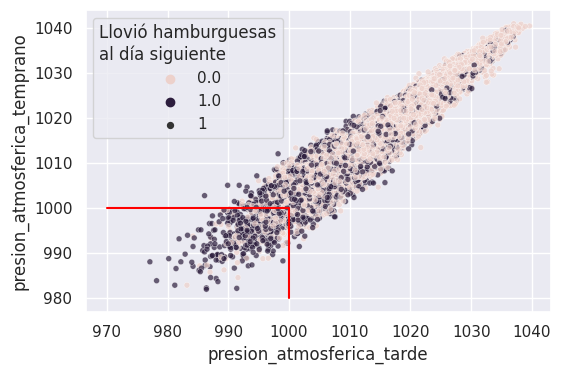

In [516]:
graficar_scatter(('presion_atmosferica_tarde', 'presion_atmosferica_temprano'), df, puntos_extra = ([970, 1000, 1000], [1000, 1000, 980]))

En este gráfico también se puede observar una alta correlación entre las presiones. Parecería que cuando ambas son bajas ($<1000$), se encuentra una concentración bastante grande de samples en las que al día siguiente llueven hamburguesas.

### Temperaturas

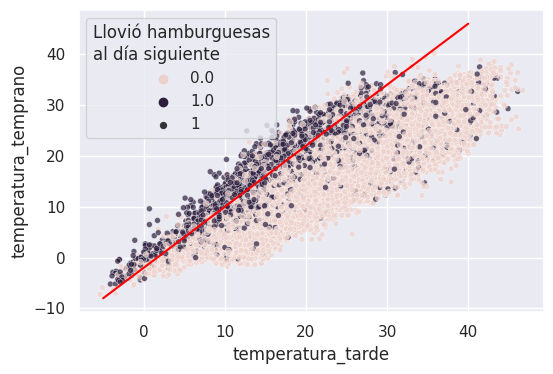

In [540]:
x = np.linspace(-5, 40, 3)
y = 1.2*x - 2

graficar_scatter(('temperatura_tarde', 'temperatura_temprano'), df, (x, y))

In [539]:
cant_no = len(df[(df.temperatura_temprano > 1.2*df.temperatura_tarde - 2) & (df[variable_target] == 0)])
cant_si = len(df[(df.temperatura_temprano > 1.2*df.temperatura_tarde - 2) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relacion: {100*cant_si/cant_no : .2f}%")

Cantidad de samples positivos por encima de la recta: 2168
Cantidad de samples negativos por encima de la recta: 780
Relacion:  277.95%


Nuevamente tenemos dos variables muy relacionadas, y se puede ver claramente en el gráfico como cuando la temperatura de la mañana está por encima de la recta, para la mayoría de los samples llueve hamburguesas al día siguiente.
La recta es casi $y=x$, es decir que esto se da casi siempre que la temperatura de la mañana es mayor a la de la tarde.

### Temperaturas extremas

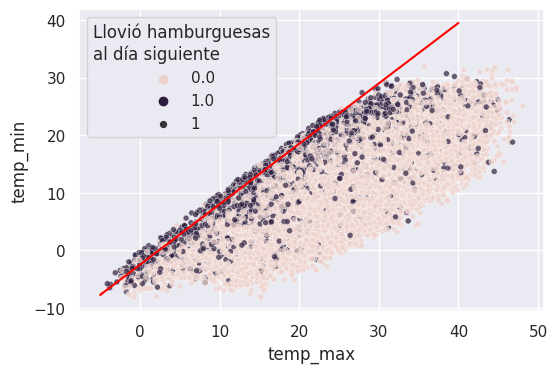

In [575]:
x = np.linspace(-5, 40, 3)
y = 1.05*x - 2.5
graficar_scatter(('temp_max', 'temp_min'), df, (x, y))

In [578]:
cant_no = len(df[(df.temp_min > 1.05*df.temp_max - 2.5) & (df[variable_target] == 0)])
cant_si = len(df[(df.temp_min > 1.05*df.temp_max - 2.5) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relacion: {100*cant_si/cant_no : .2f}%")

Cantidad de samples positivos por encima de la recta: 515
Cantidad de samples negativos por encima de la recta: 103
Relacion:  500.00%


Para las temperaturas máximas y mínimas, tenemos una relación similar a la anterior. En este caso, cuando la temperatura máxima y mínima del día son muy próximas suele llover al día siguiente.

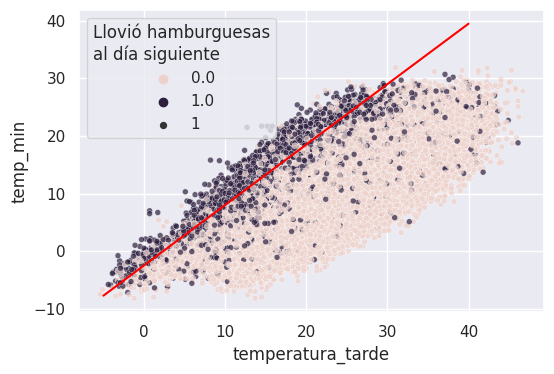

In [584]:
x = np.linspace(-5, 40, 3)
y = 1.05*x - 2.5
graficar_scatter(('temperatura_tarde', 'temp_min'), df, (x, y))

In [586]:
cant_no = len(df[(df.temp_min > 1.1*df.temperatura_tarde - 2.5) & (df[variable_target] == 0)])
cant_si = len(df[(df.temp_min > 1.1*df.temperatura_tarde - 2.5) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relacion: {100*cant_si/cant_no : .2f}%")

Cantidad de samples positivos por encima de la recta: 1835
Cantidad de samples negativos por encima de la recta: 443
Relacion:  414.22%


## ¿Cuál es el porcentaje de samples del total llueve al día siguiente?

In [ ]:
print(f"{len(df_original[df_original['llovieron_hamburguesas_al_dia_siguiente'] == 'si'])/len(df_original) * 100 :.2f}%")

## ¿Cómo varían las features categóricas restantes cuando llueve al día siguiente?

### Barrio

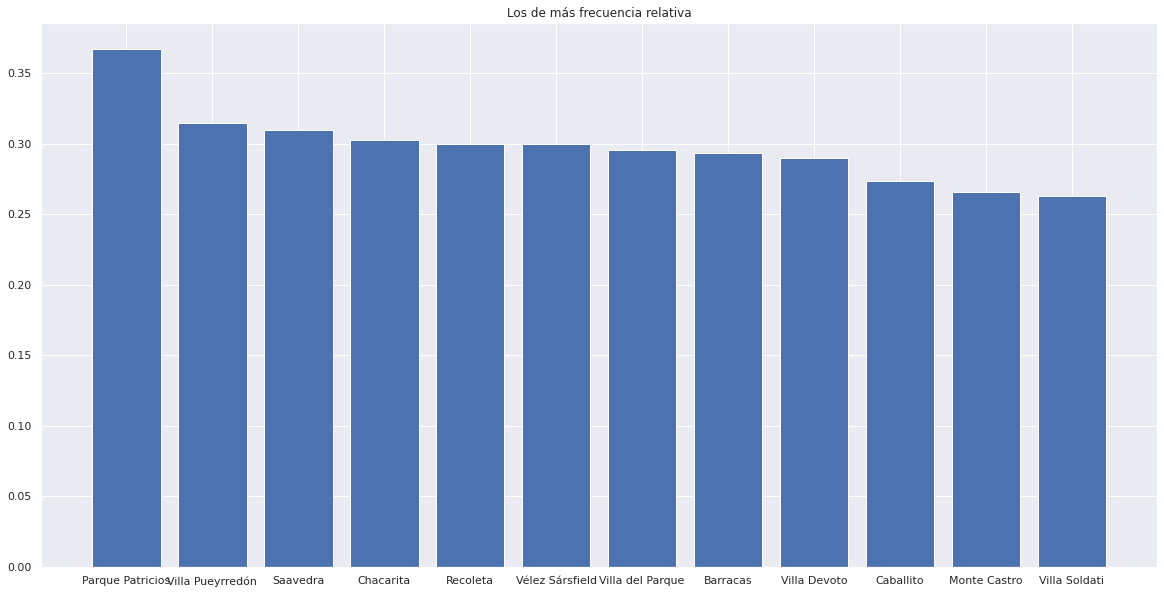

In [470]:
fig = plt.figure(figsize=(20, 10))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['barrio'].value_counts()
total = df['barrio'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)
serie_graf = serie_graf[:len(serie_graf)//4]
plt.bar(serie_graf.index, serie_graf.array)
plt.title("Los de más frecuencia relativa")
plt.show()

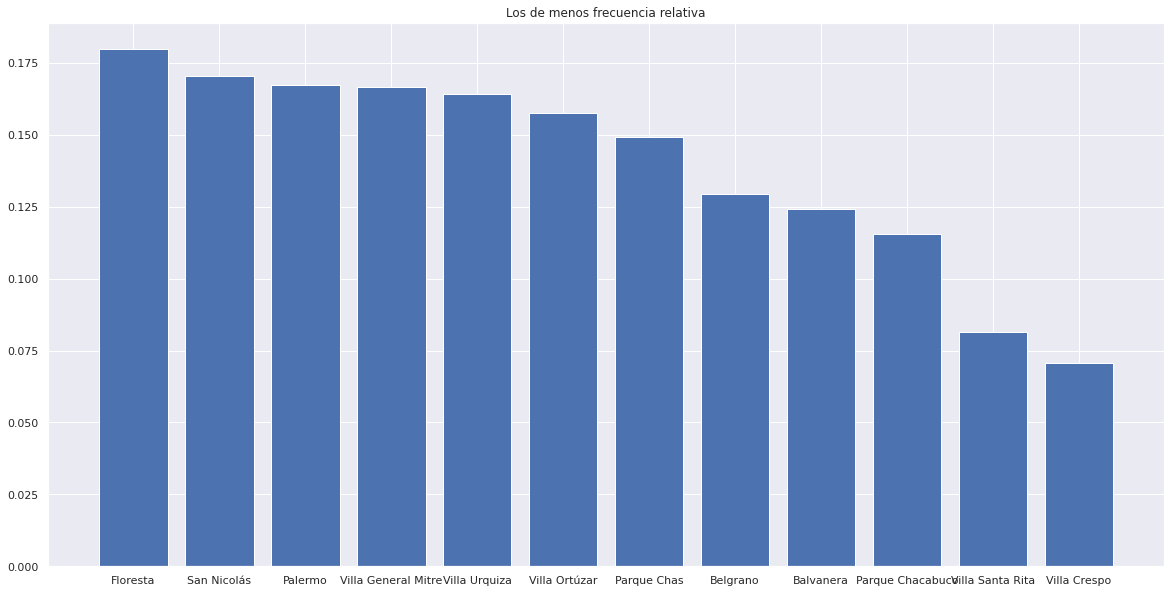

In [486]:
fig = plt.figure(figsize=(20, 10))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['barrio'].value_counts()
total = df['barrio'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)
serie_graf = serie_graf[3*len(serie_graf)//4:]
plt.bar(serie_graf.index, serie_graf.array)
plt.title("Los de menos frecuencia relativa")
plt.show()

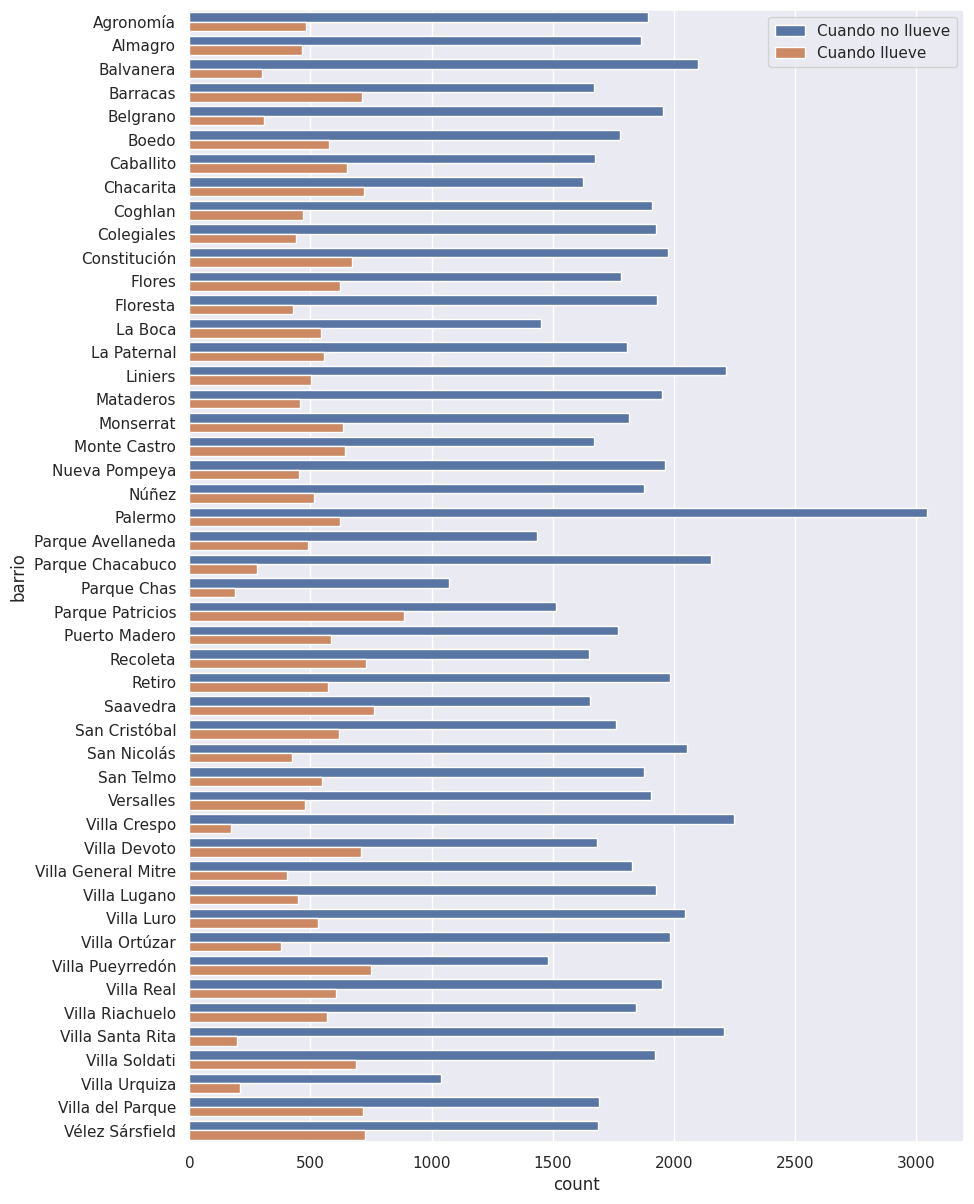

In [495]:
sns.countplot(data=df, y="barrio", hue=variable_target, hue_order=[0, 1], orient = 'v')
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(15)
plt.gcf().set_dpi(100)
plt.gca().legend(["Cuando no llueve", "Cuando llueve"])
plt.show()

### Lluvia de hamburguesas del día actual

In [ ]:
fig = plt.figure(figsize=(10, 5))
con_lluvia = df[df['llovieron_hamburguesas_al_dia_siguiente'] == 1]['llovieron_hamburguesas_hoy'].value_counts()
total = df['llovieron_hamburguesas_hoy'].value_counts()
serie_graf = (con_lluvia / total).sort_values(ascending = False)

plt.bar(serie_graf.index, serie_graf.array)
plt.show()

Podemos notar que si llovió en el día de la fecha aumentan las probabilidades de que llueva al día siguiente mientras que que no lo haya hecho las bajan.

In [622]:
"""
def llueve(row, resultado, a, b, c, d):
    if row["horas_de_sol"] > 8: #8
        resultado.append('no')
        return
    elif row["mm_lluvia_dia"] < 2:
        resultado.append("no")
        return
    elif row["rafaga_viento_max_velocidad"] < 40:
        resultado.append("no")
        return
    resultado.append("si")
"""
def llueve(row, resultado):
    ret = 'no'
    if row['horas_de_sol'] <= 1:
        ret = 'si'
    if row['humedad_tarde'] >= 80:
        ret = 'si'
    #if row['nubosidad_tarde'] == 8:
    #    ret = 'si'
    if row['presion_atmosferica_temprano'] <= 1000:
        ret = 'si'
    try:
        if row['presion_atmosferica_tarde'] <= 1000:
            ret = 'si'
    except:
        pass
    
    if row['rafaga_viento_max_velocidad'] >= 80:
        ret = 'si'
    if 1.2*row['temperatura_tarde'] - 2 < row['temperatura_temprano']:
        ret = 'si'
    if 1.05*row['temp_max'] - 2.5 < row['temp_min']:
        ret = 'si'
    if row['mm_lluvia_dia'] >= 30:
        ret = 'si'

        
    if row['barrio'] == "Villa Crespo":
        ret = 'no'
    if row['horas_de_sol'] >= 8:
        ret = 'no'
    if row['nubosidad_tarde'] == 0:
        ret = 'no'


    resultado.append(ret)

def baseline(dataframe):
    resultado = []
    dataframe.apply(lambda row: llueve(row, resultado), axis=1)
    return resultado

#df_muestra = df_original.sample(100000, random_state=0)

df_con_target = df_original[~df_original[variable_target].isna()]

resultado_baseline = baseline(df_con_target)
correctos = 0
falsos_positivos = 0
for i, x in enumerate(df_con_target[variable_target].tolist()):
    if x == resultado_baseline[i]:
        correctos += 1
    if x == 'no' and resultado_baseline[i] == 'si':
        falsos_positivos += 1
    
print(f"Porcentaje correctos: {correctos/len(resultado_baseline)*100 : .2f}%")
print(f"Porcentaje de falsos positivos entre los incorrectos: {100*falsos_positivos/(len(resultado_baseline)-correctos) : .2f}%")
print(f"Cantidad de falsos positivos: {falsos_positivos}")
cant_pos = len(df_con_target[df_con_target[variable_target] == 'si'])
print(f"Porcentaje de positivos que faltan detectar: {100*(resultado_baseline.count('si') - falsos_positivos)/cant_pos :.2f}%")

Porcentaje correctos:  82.28%
Porcentaje de falsos positivos entre los incorrectos:  25.59%
Cantidad de falsos positivos: 5156
Porcentaje de positivos que faltan detectar: 41.09%


In [ ]:
df_llovio = df[df.llovieron_hamburguesas_al_dia_siguiente == 1]
df_no_llovio = df[df.llovieron_hamburguesas_al_dia_siguiente == 0]

sns.kdeplot(
    x="humedad_tarde",
    data=df_llovio[df_llovio.humedad_tarde < df_llovio.humedad_tarde.quantile(0.9)]
    #bins=5
)
sns.kdeplot(
    x="humedad_tarde",
    data=df_no_llovio[df_no_llovio.humedad_tarde < df_no_llovio.humedad_tarde.quantile(0.9)]
    #bins=5
)
grupo.llovieron_hamburguesas_al_dia_siguiente

In [ ]:
df[df.mm_lluvia_dia < 10].mm_lluvia_dia.nunique()

In [ ]:
df_filt = df_original[(df_original.humedad_tarde < 60)]
print(df_filt.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_filt) / len(df_original)

In [ ]:
df_filt = df_original[(df_original.humedad_temprano < 60)]
print(df_filt.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_filt) / len(df_original)

In [ ]:
df_subm = df_original[df_original.presion_atmosferica_temprano < 1080]
print(df_subm.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True))
len(df_subm) / len(df)

In [ ]:
pred = (df.llovieron_hamburguesas_al_dia_siguiente == "gnieh")
len(df[pred == df.llovieron_hamburguesas_al_dia_siguiente.replace({"si": 1, "no": 0})])/len(pred)

In [ ]:
pred == df.llovieron_hamburguesas_al_dia_siguiente

In [ ]:
df[(df.mm_lluvia_dia > 2.5) & (df[variable_target] == 0)]
df[df.mm_lluvia_dia <= ]

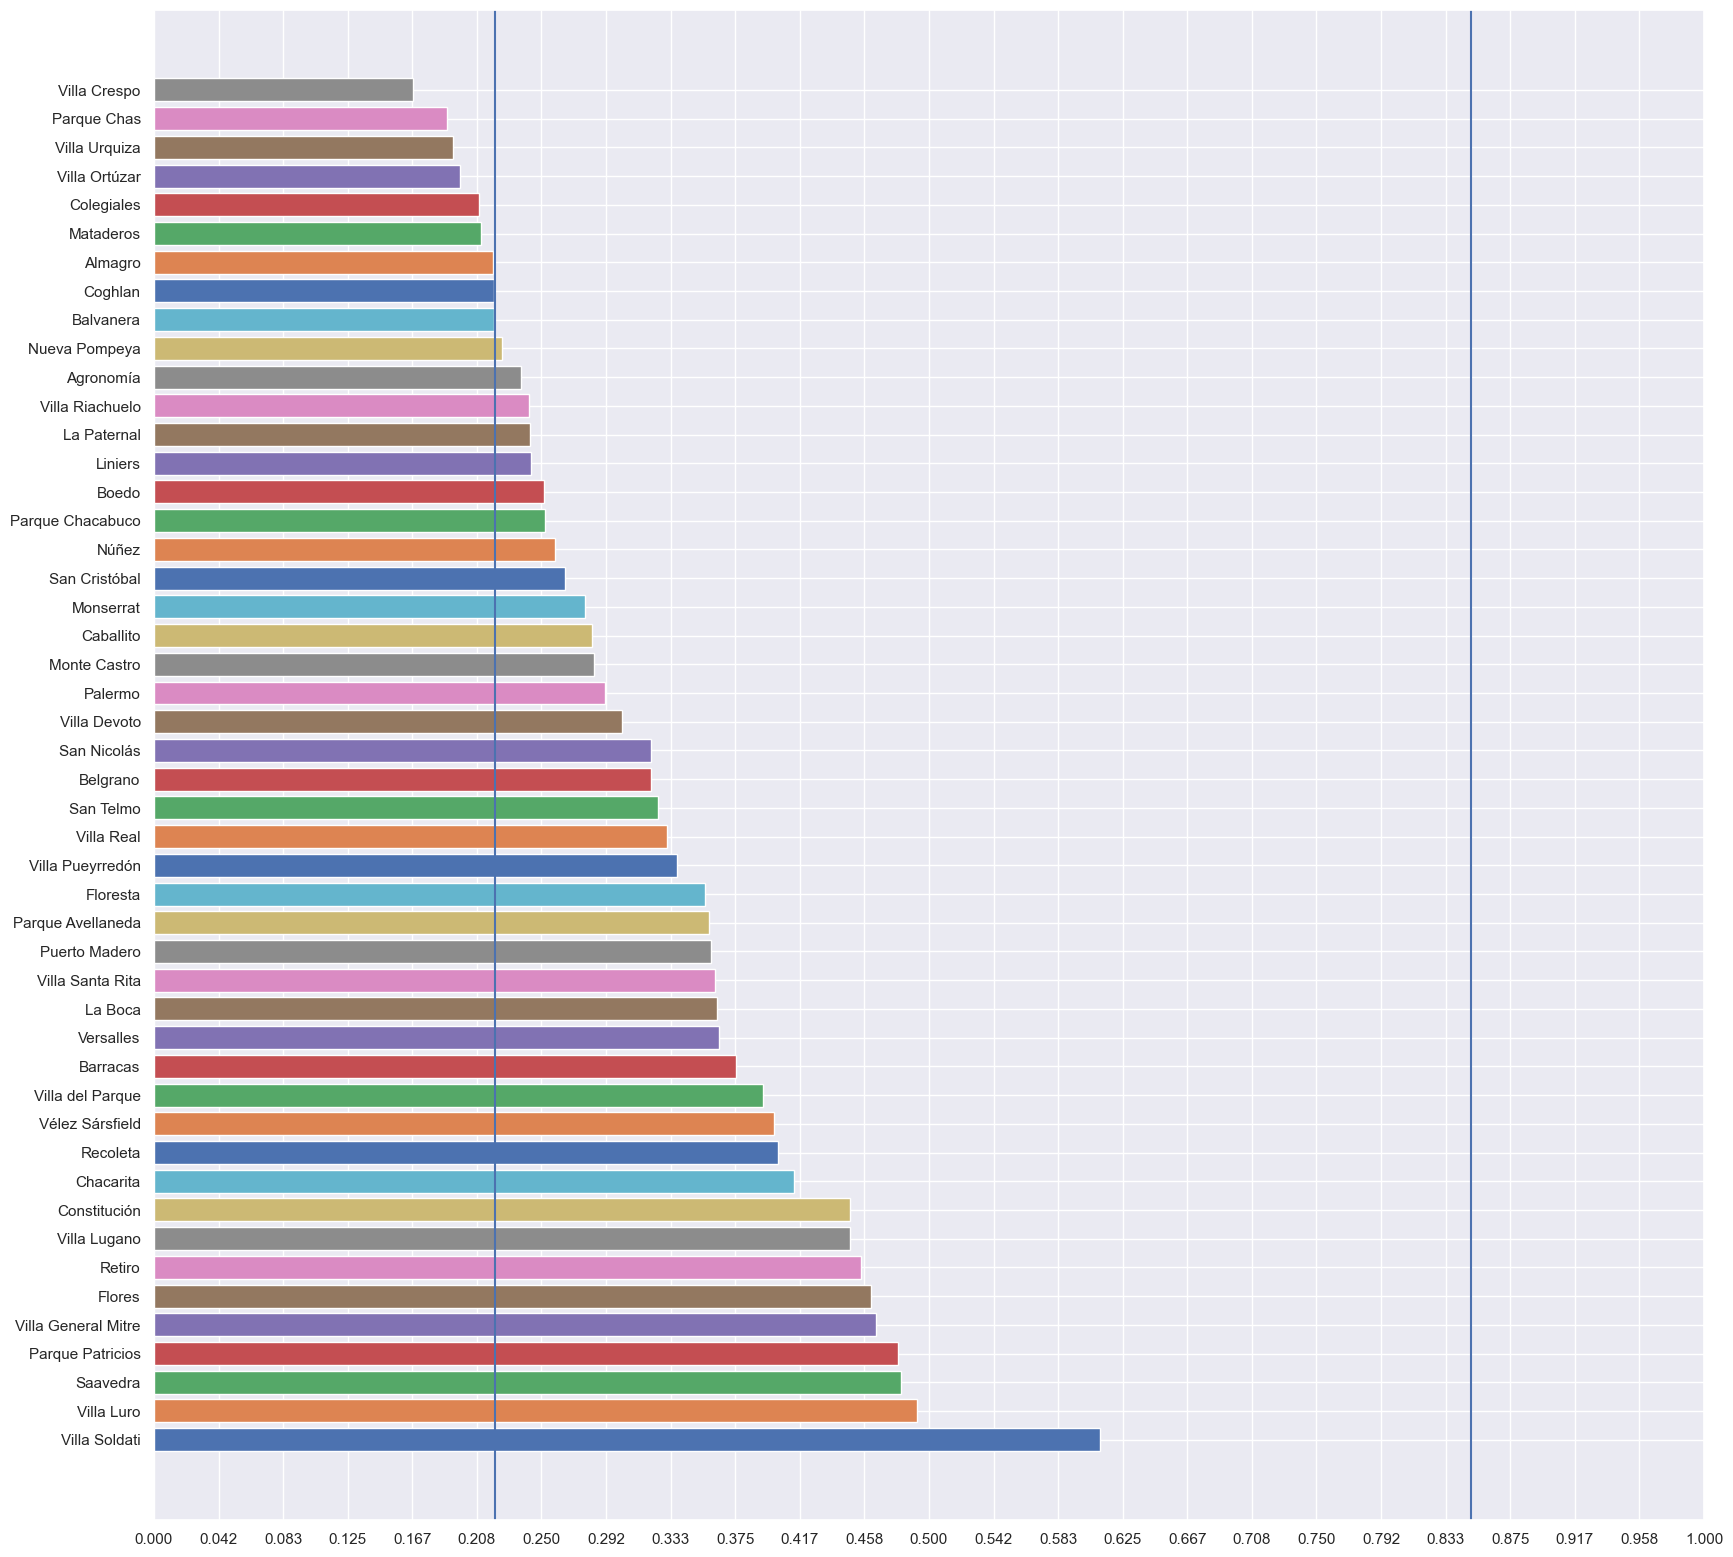

In [645]:
barrios = sorted(df.barrio.unique(), key = lambda barrio: df[df.barrio == barrio][variable_target].value_counts(normalize=True).loc[0])
plt.figure(dpi=100, figsize=(20,20))
for barrio in barrios:
    foo = df[df.barrio == barrio][variable_target].value_counts(normalize=True)
    plt.barh(barrio, foo.loc[1])
plt.axvline(0.22)
plt.axvline(0.85)
plt.xticks(np.linspace(0,1,25))
plt.show()

In [576]:
df[df.barrio == "Belgrano"][variable_target].value_counts(normalize=True)

0.0    0.863195
1.0    0.136805
Name: llovieron_hamburguesas_al_dia_siguiente, dtype: float64

<Figure size 600x400 with 0 Axes>

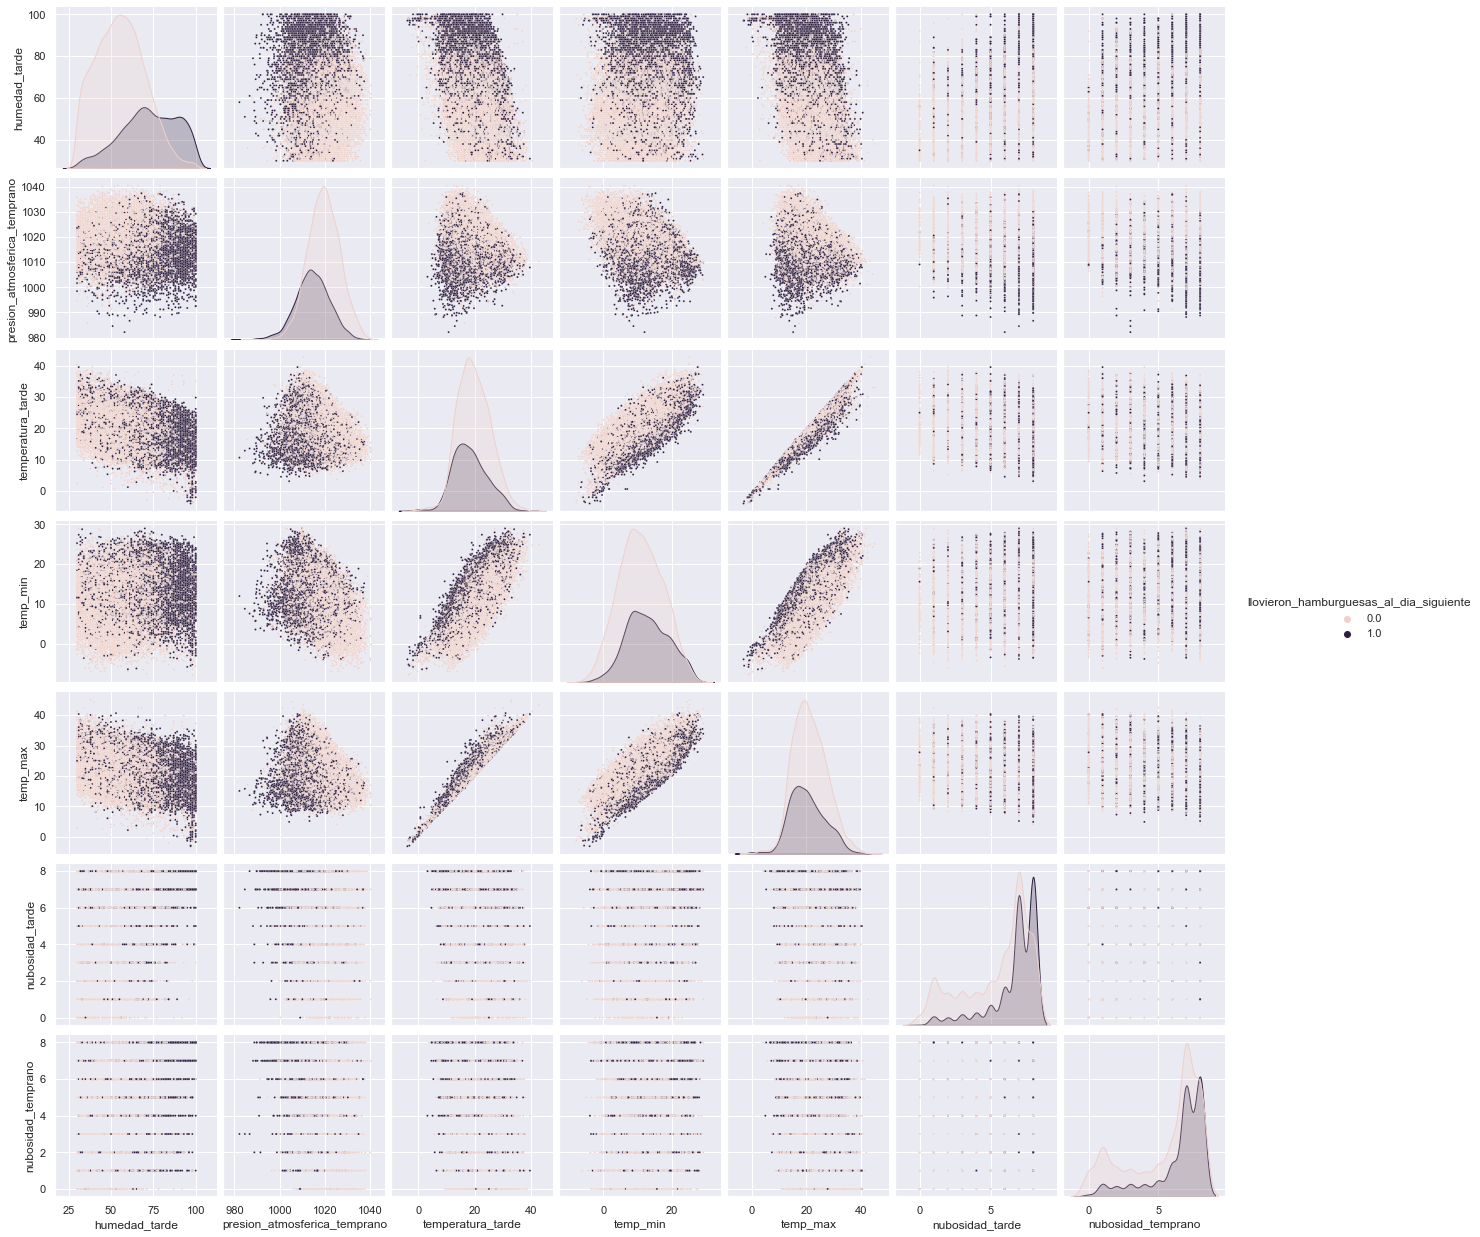

In [648]:
plt.figure(dpi=100)
sns.pairplot(
    df[["humedad_tarde",
        "presion_atmosferica_temprano",
        "temperatura_tarde",
        "temp_min",
        "temp_max",
        "nubosidad_tarde",
        "nubosidad_temprano",
        variable_target]].sample(25000, random_state=0),
    hue=variable_target,
    plot_kws={"s": 4}
)